<a href="https://colab.research.google.com/github/samuel-haddad/MBAUSP/blob/main/eda_tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

#### MBA Data Science & Analytics - USP & ESALQ
Trabalho de Conclusão de Curso - 02/2022 <br>
**Título:** Um estudo comparativo entre modelos Multinível, Logístico e XGBoost na detecção de fraudes ideológicas no setor financeiro. <br>
**Autor:** Samuel Haddad Simões Machado
<br>

## Bibliotecas

In [1]:
%%capture
# instalar as bibliotecas
!pip install -U matplotlib==3.5.3
!pip install sweetviz

**REINICIAR O AMBIENTE DE EXECUÇÃO**

In [1]:
# pacotes básicos
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# biblioteca de auto eda
import sweetviz as sv

# google libs & auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# autenticar e criar o cliente com PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Dataset Chi-quadrado
O dataset com a seleção de variáveis pelo método do testechi-quadrado foi utilizado como base para a geração dos gráficos de caixa por conter todas as variáveis numéricas e os grupos da variável "group". Para os demais datasets, foram gerados relatórios de Auto EDA com a biblioteca Sweetviz.

In [2]:
# link do arquivo no Drive
link = 'https://drive.google.com/file/d/1oCg6A5KE_-AleGAnsaK2OxbxHQt2Nvpl/view?usp=sharing'
 
# extraindo o ID do link
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('base_tcc_chi_group20220927.csv') 
 
# criando o dataframe 
df = pd.read_csv('base_tcc_chi_group20220927.csv', sep=';')
df.head()

target      var2      var3      var4      var5      var6  var7  var8  var9  \
0       0  0.125744  0.542937 -0.204706 -0.125772  0.045158     0     0     0   
1       1 -0.194939  0.542937  0.209826 -1.703008  0.583525     1     0     0   
2       0  0.067438  0.542937  1.079848  1.610250  0.030451     0     0     1   
3       0  0.424562  0.542937 -0.454262  0.781935  0.583525     0     1     0   
4       0  0.424562  0.542937 -0.211115 -1.288851  0.583525     0     0     0   

   var10  ...  var220  var221  var222  var223  var224  var225  var226  var227  \
0      0  ...       1       1       0       1       0       1       0       0   
1      0  ...       1       0       0       1       0       1       0       0   
2      0  ...       1       1       0       1       0       0       1       0   
3      0  ...       1       0       0       1       0       0       0       0   
4      0  ...       1       0       0       1       1       0       0       0   

   group  id  
0    192   2  
1    279  10  
2    198  26  
3    200  48  
4    223  59  

[5 rows x 229 columns]

### Auto EDA

### Quartis & Outliers

In [3]:
numeric_list = ['var2'
                ,'var3'
                ,'var4'
                ,'var5'
                ,'var6'
                ]

fig, axes = plt.subplots(5, 1, figsize=(10, 15), gridspec_kw=({'hspace':1}))
fig.suptitle('Boxplots (variáveis numéricas)', fontsize=12, weight='semibold')
sns.set_style("ticks")
sns.despine(left=True)

for column, r in zip(numeric_list, [0,1,2,3,4]):
    ax = sns.boxplot(ax=axes[r], x=df[column], color='lightgrey')
    axes[r].set_title(column)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_range = (df[column] < (Q1 - 1.5*IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    num_outliers = df[column][outlier_range].count()
    ax.set(xlabel=f"{num_outliers} outliers")

### Distribuição por grupo

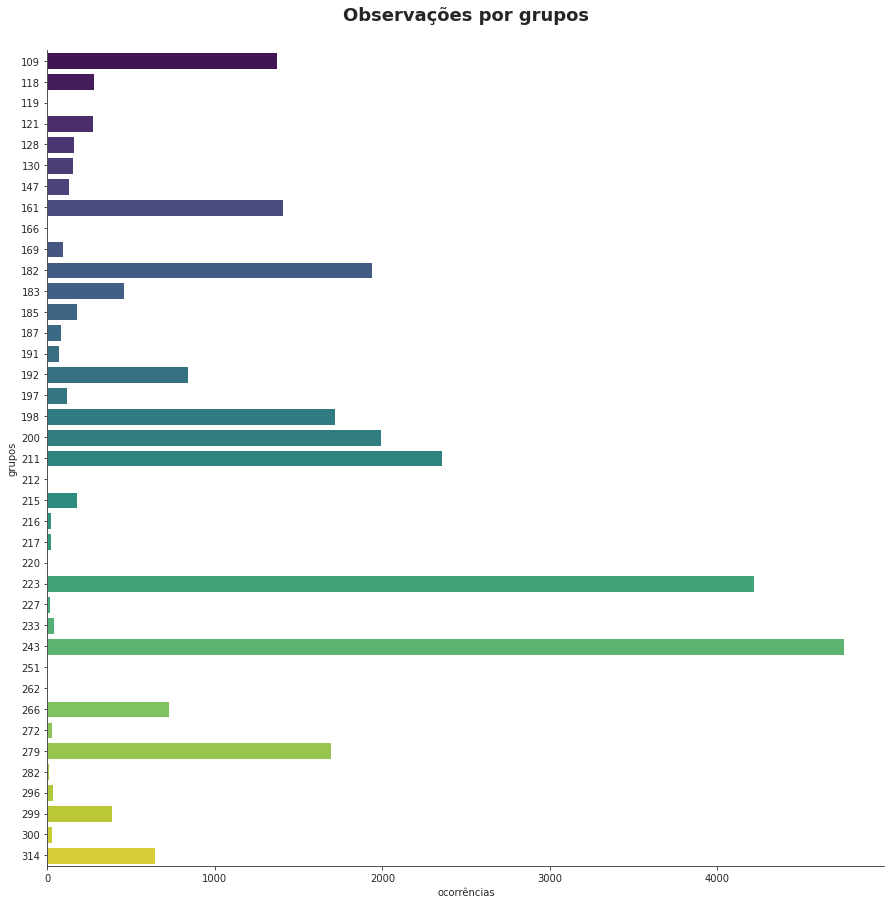

In [4]:
plt.figure(figsize=(15,15))
plt.title('Observações por grupos', fontsize=18, weight='semibold', pad=30)
sns.set_style("ticks")
sns.despine(left=False)
ax = sns.countplot(y="group", data=df,palette='viridis')
ax.set(xlabel='ocorrências')
ax.set(ylabel='grupos');

## Dataset Logreg

In [5]:
# link do arquivo no Drive
link = 'https://drive.google.com/file/d/1agdy7Mrlw7339_VB6k3MXA_OunitNyQ8/view?usp=sharing'
 
# extraindo o ID do link
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('base_tcc_logreg20220927.csv') 
 
# criando o dataframe 
df = pd.read_csv('base_tcc_logreg20220927.csv', sep=';')
df.head()

target      var2  var3  var4  var5  var6  var7  var8  var9  var10  ...  \
0       0  1.610250     0     0     0     0     0     0     0      1  ...   
1       1  0.160699     0     0     0     0     0     0     0      0  ...   
2       0 -1.703008     1     0     0     0     0     0     0      0  ...   
3       0  0.574857     0     0     0     0     0     0     0      0  ...   
4       1  0.574857     0     0     0     0     0     0     0      0  ...   

   var112  var113  var114  var115  var116  var117  var118  var119  var120   id  
0       0       0       1       0       1       0       0       1       0   26  
1       0       1       0       0       1       0       0       0       0  128  
2       0       1       0       0       1       0       1       0       0  147  
3       1       1       0       0       1       0       0       0       0  174  
4       0       1       0       0       1       0       1       0       0  186  

[5 rows x 121 columns]

### Auto EDA

                                             |          | [  0%]   00:00 -> (? left)

Report fraud_prevention_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



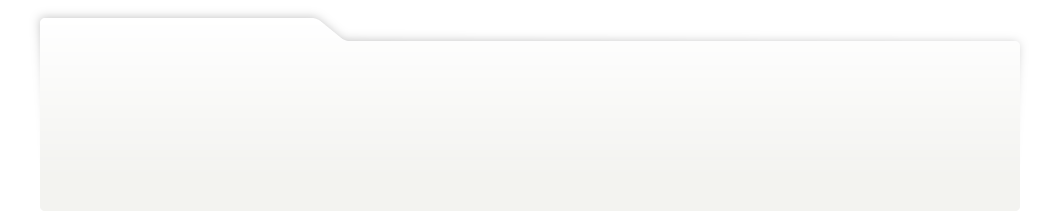
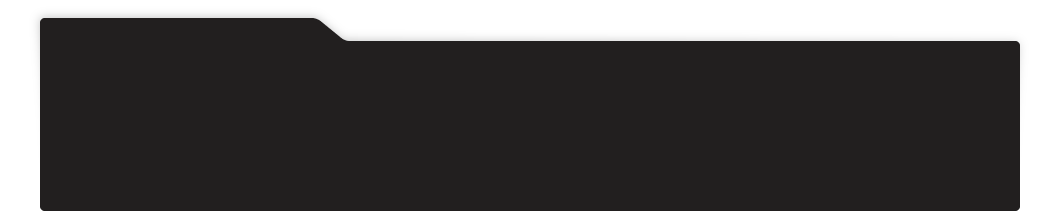
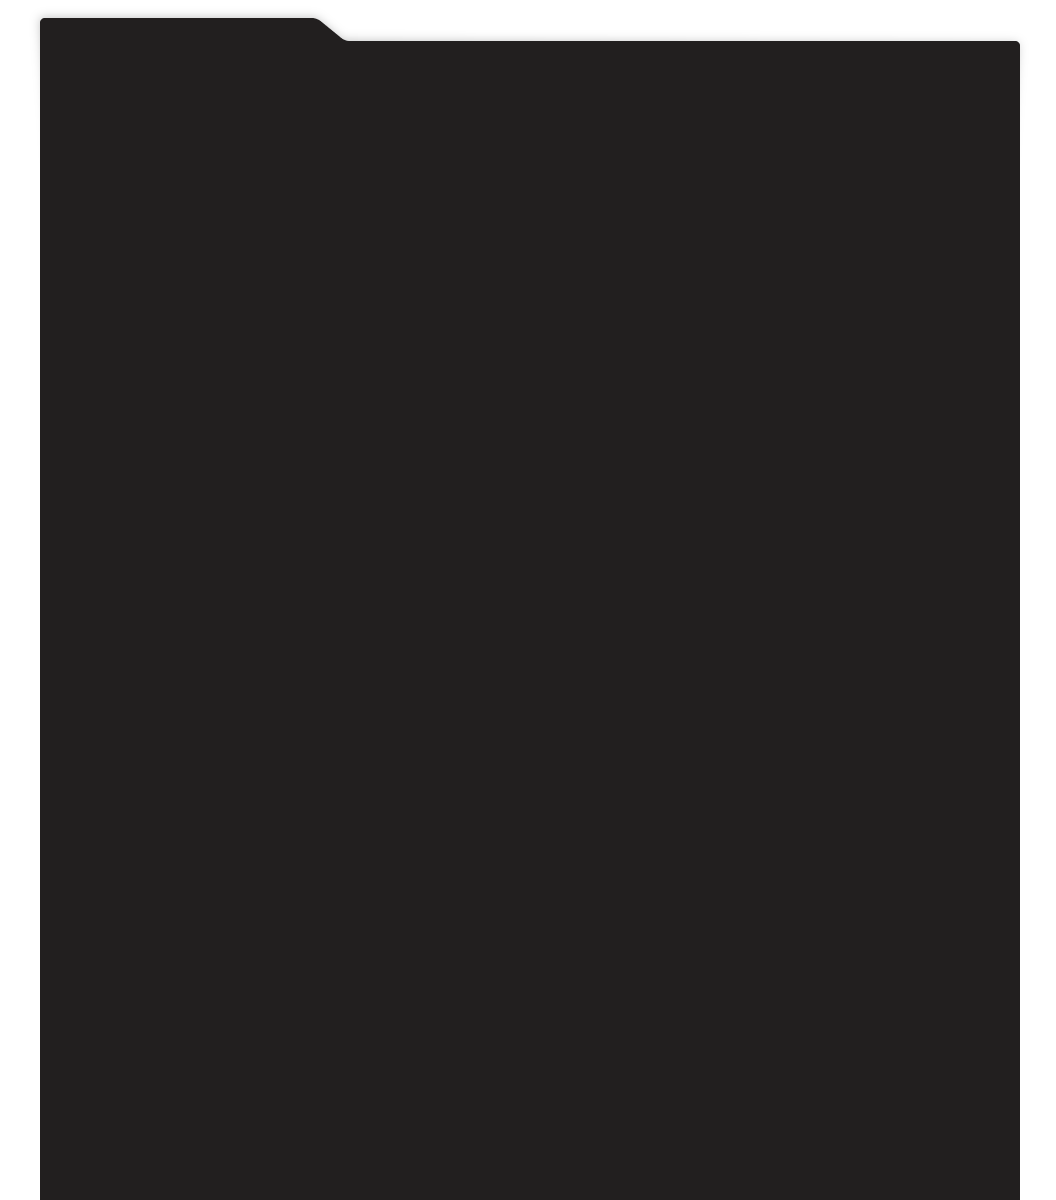
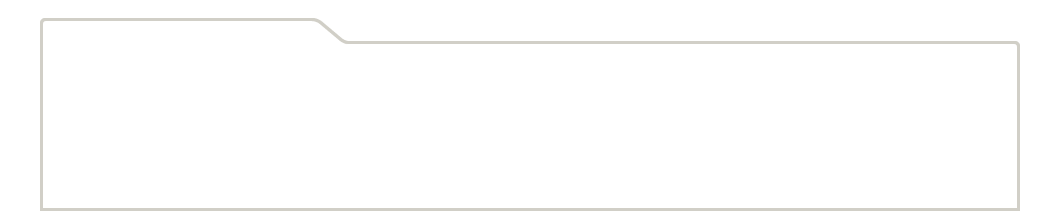
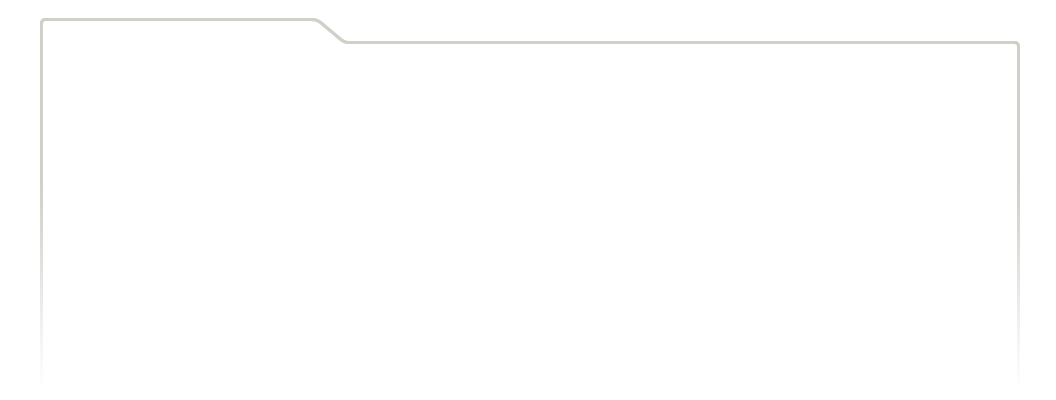
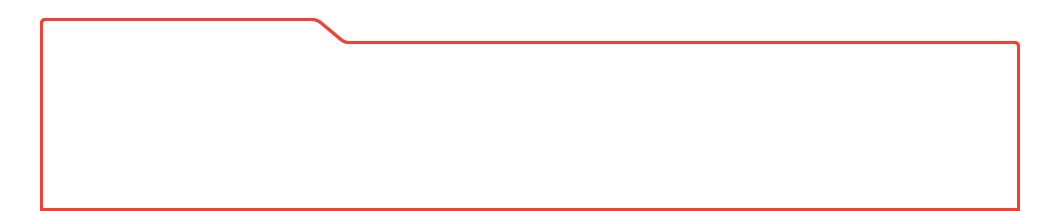
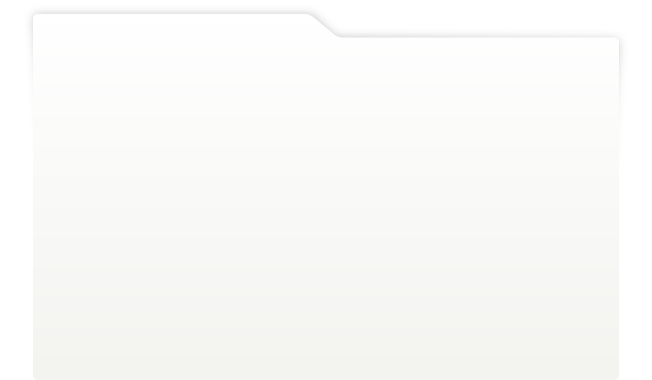
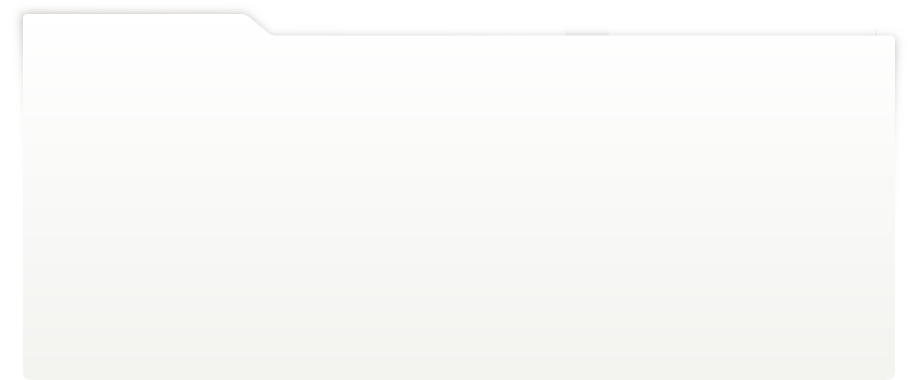
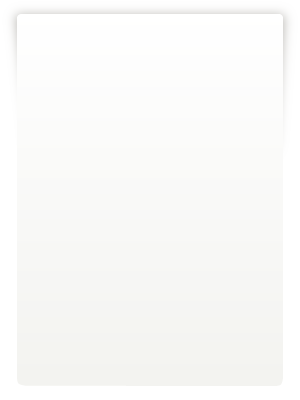
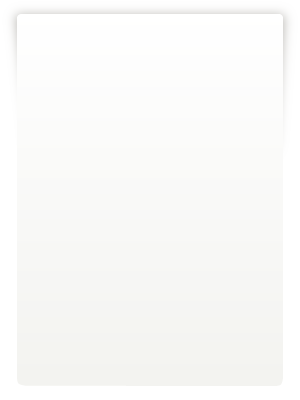
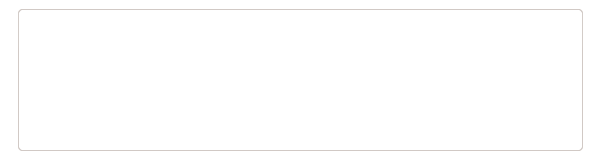
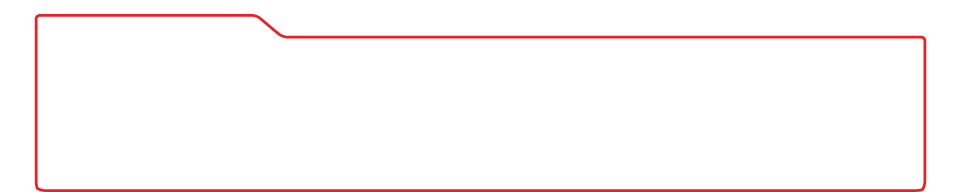
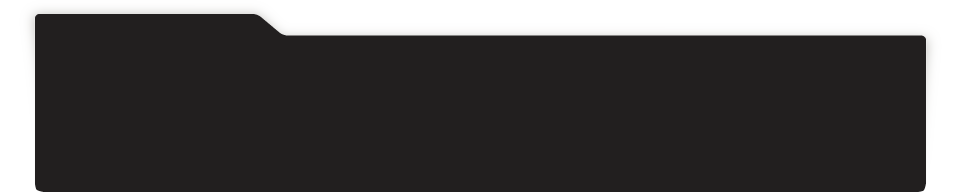
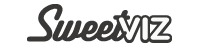
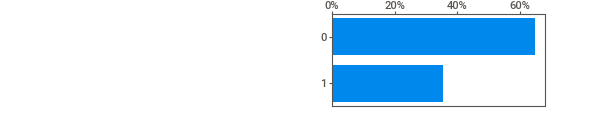
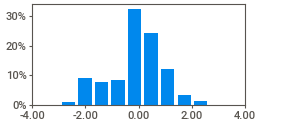
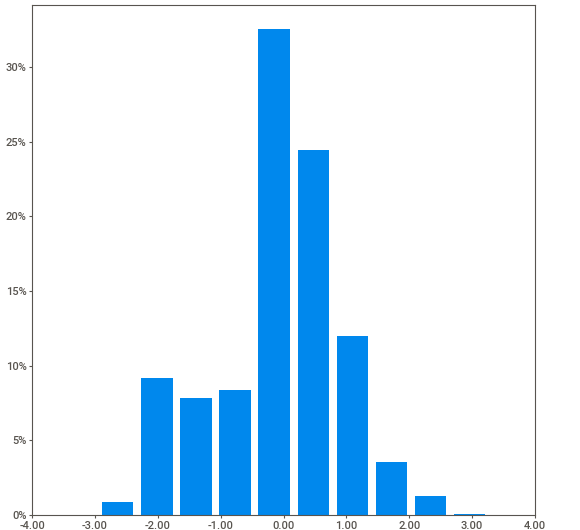
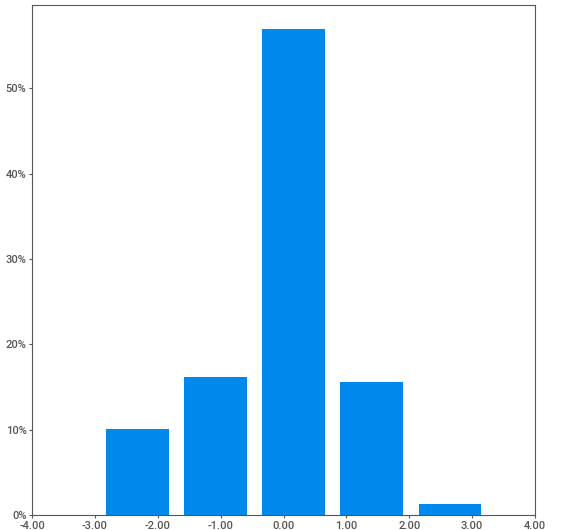
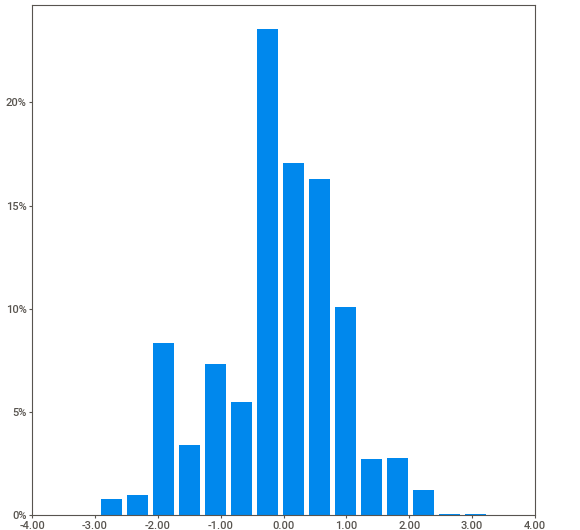
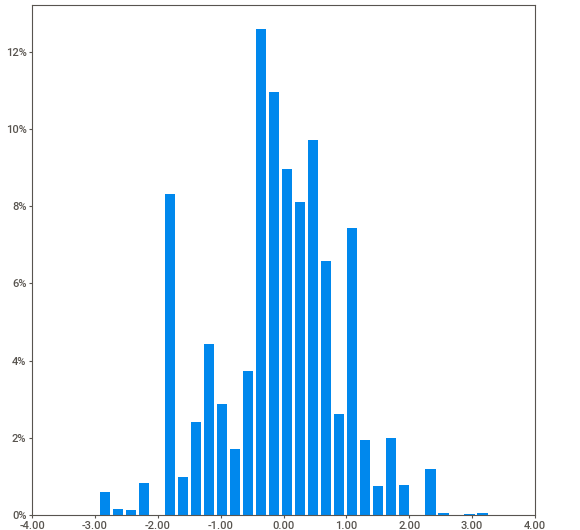
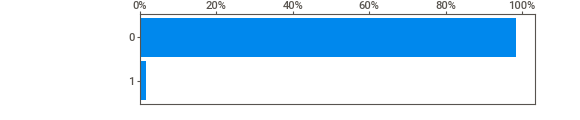
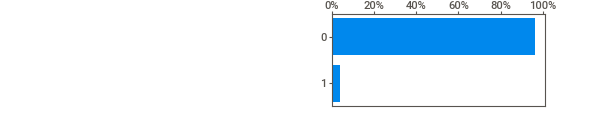
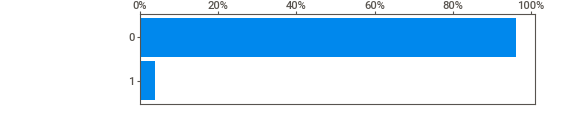
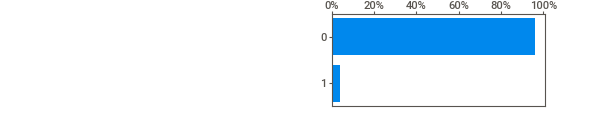
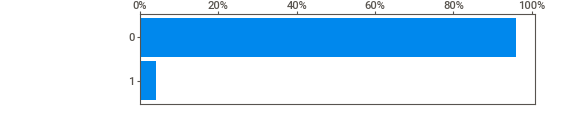
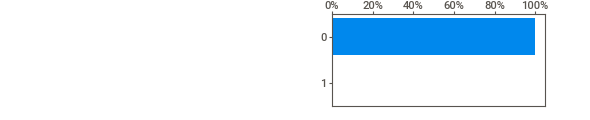
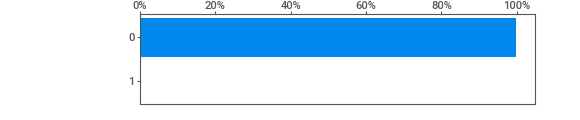
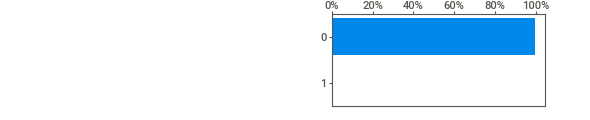
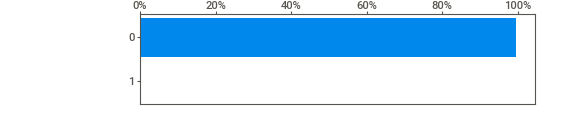
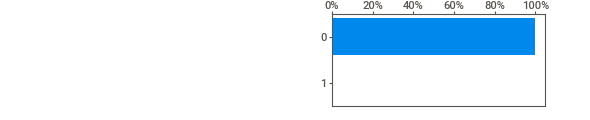
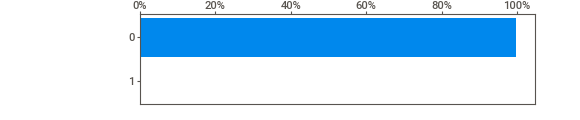
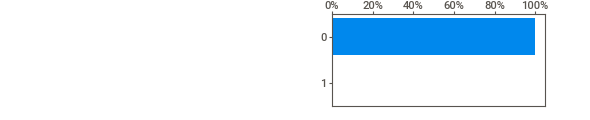
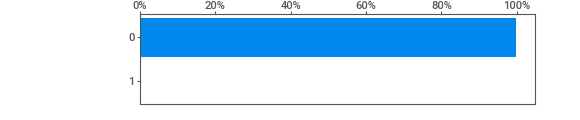
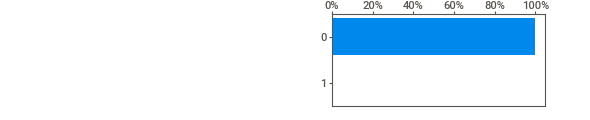
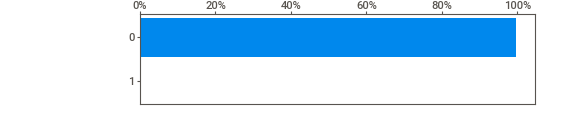
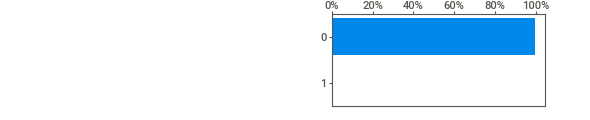
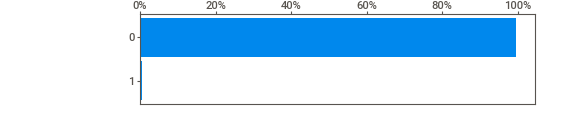
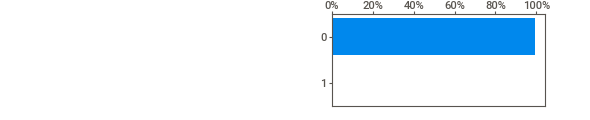
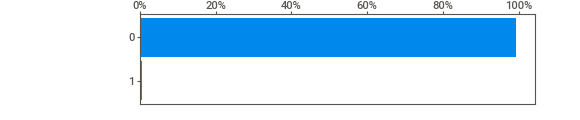
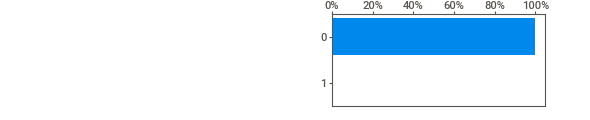
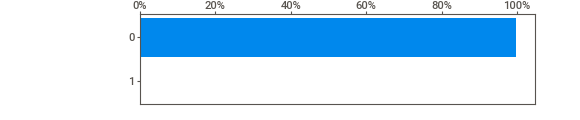
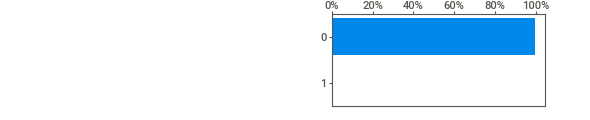
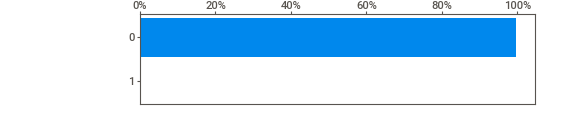
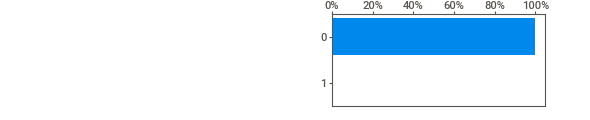
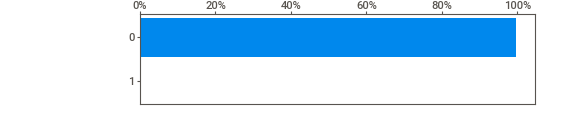
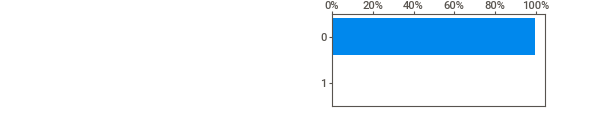
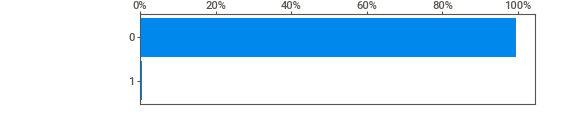
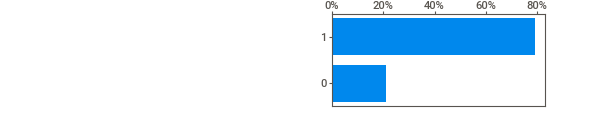
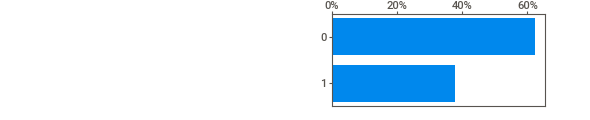
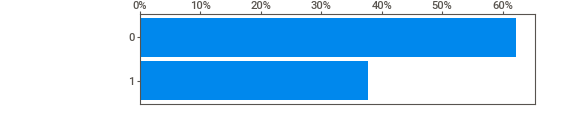
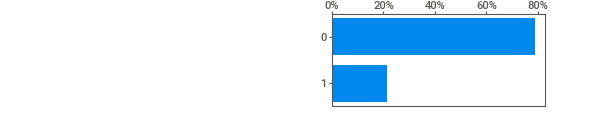
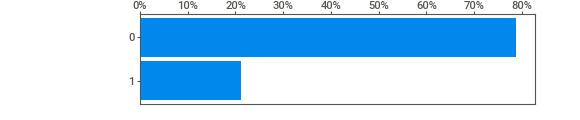
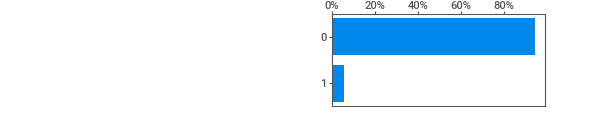
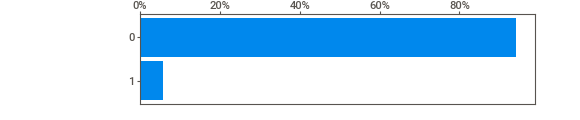
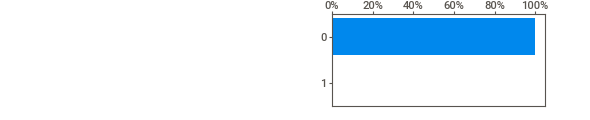
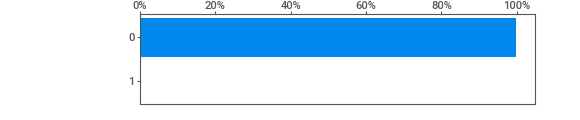
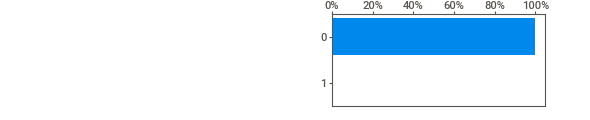
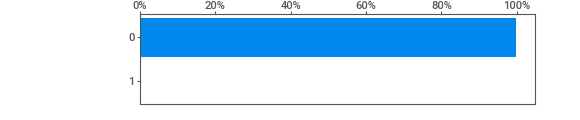
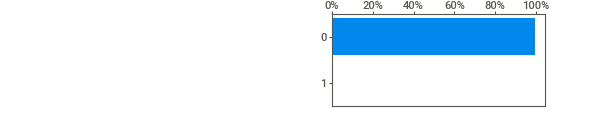
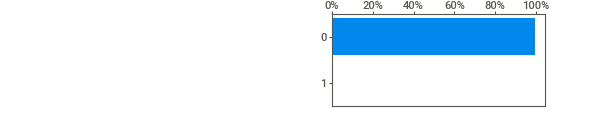
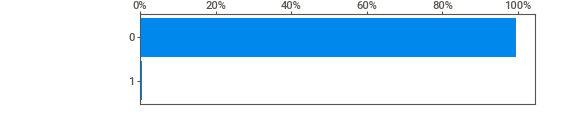
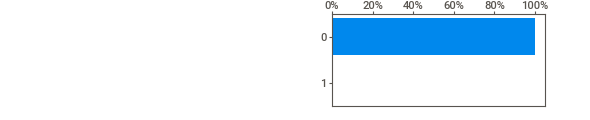
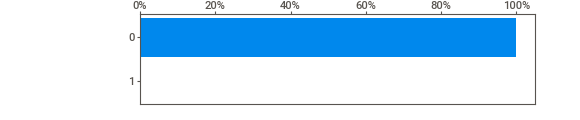
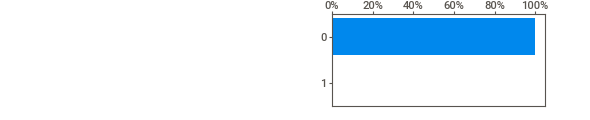
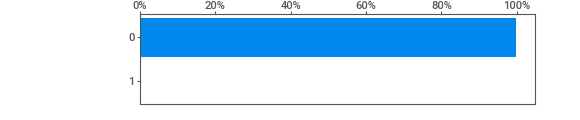
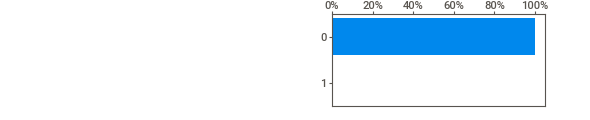
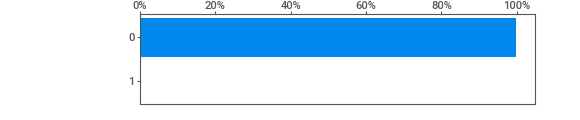
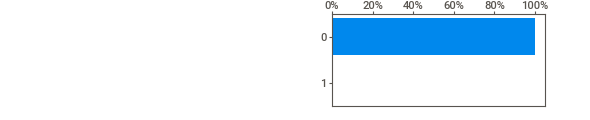
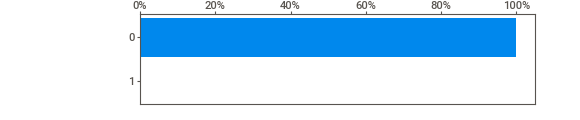
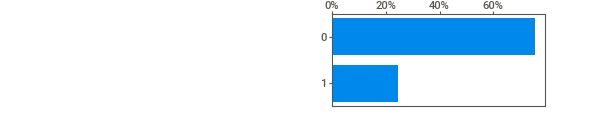
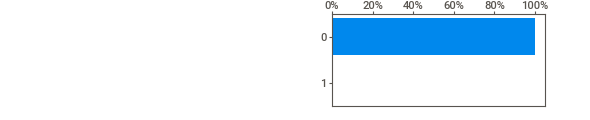
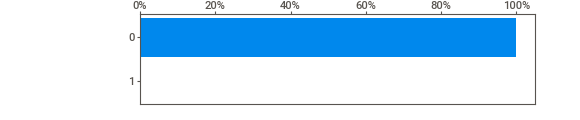
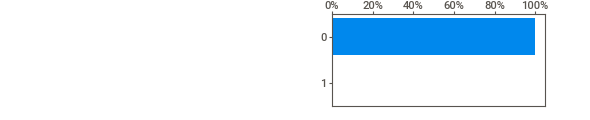
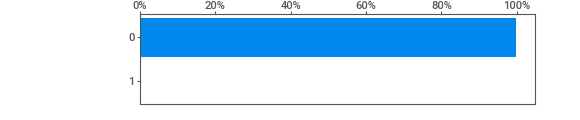
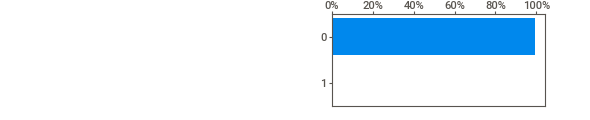
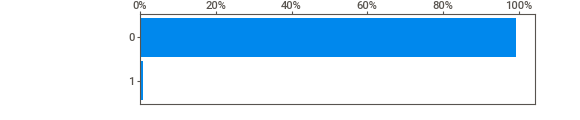
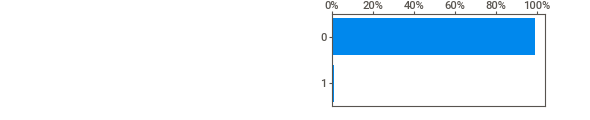
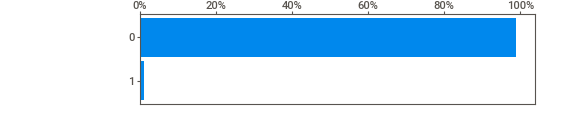
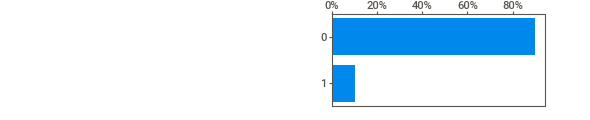
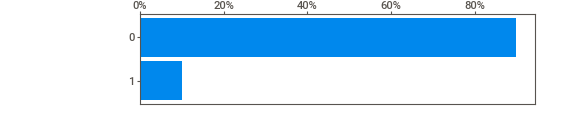
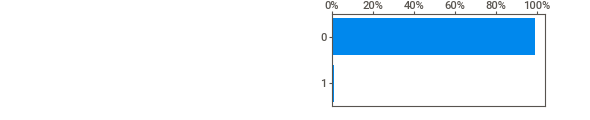
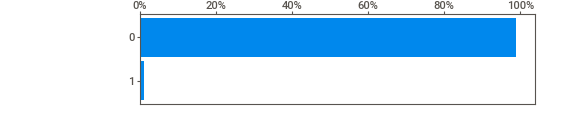
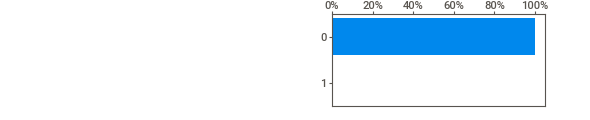
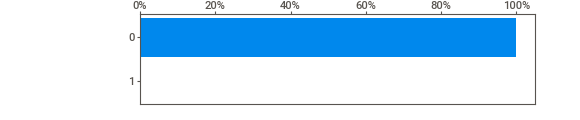
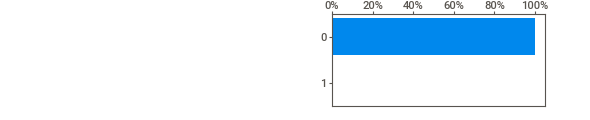
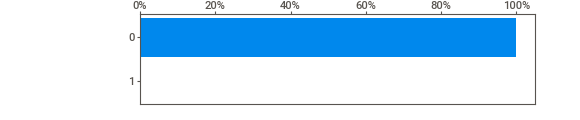
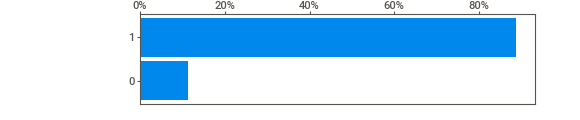
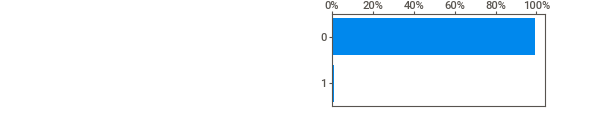
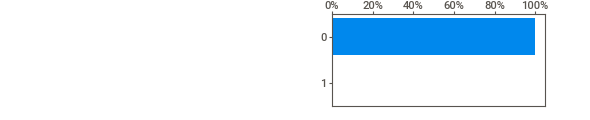
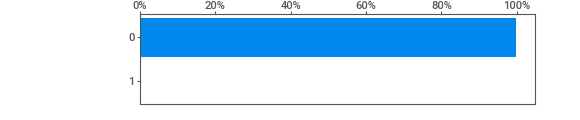
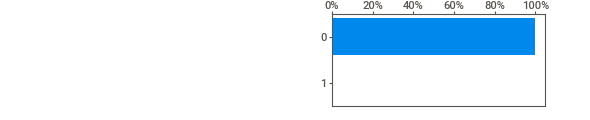
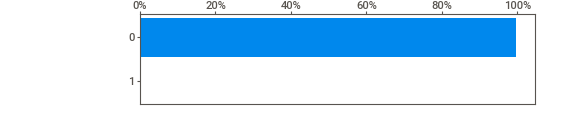
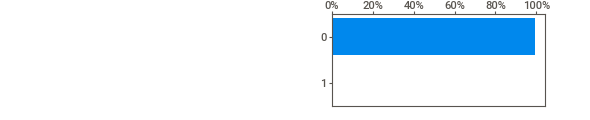
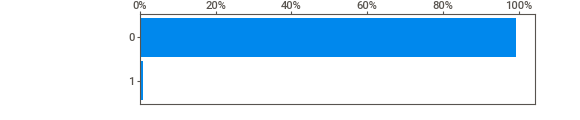
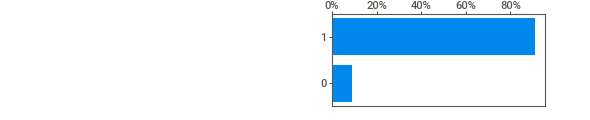
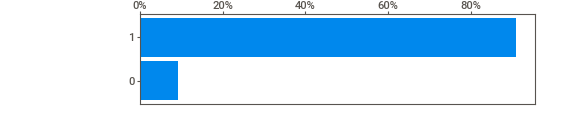
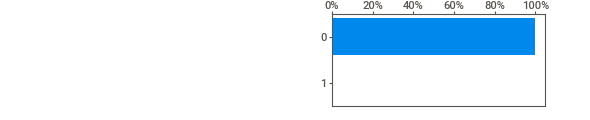
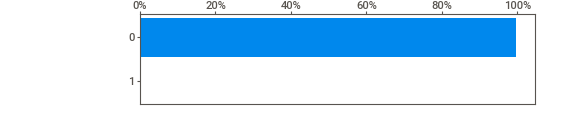
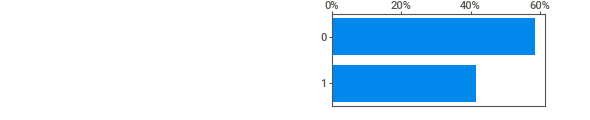
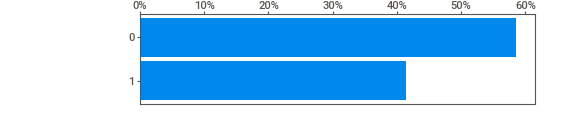
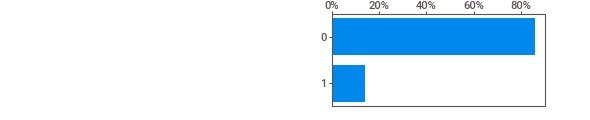
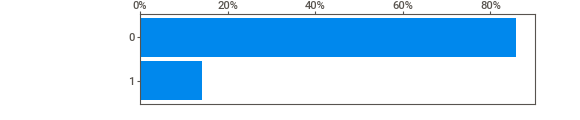
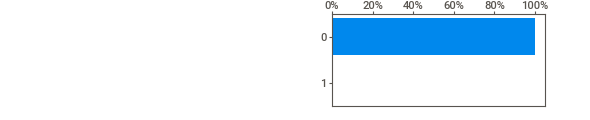
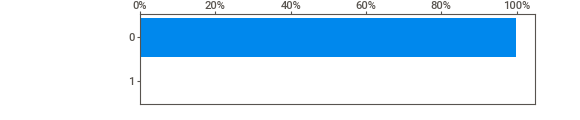
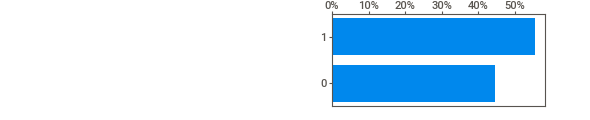
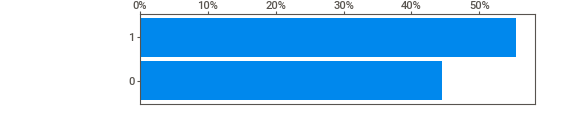
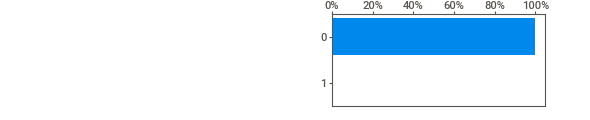
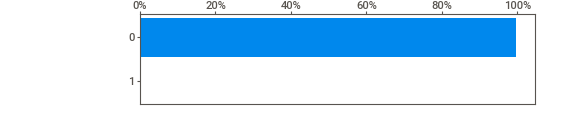
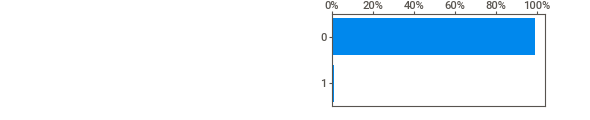
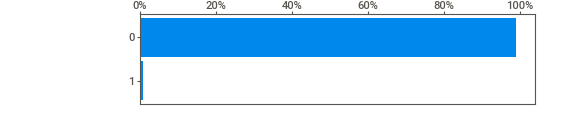
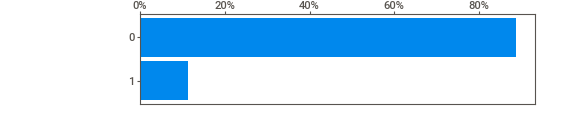
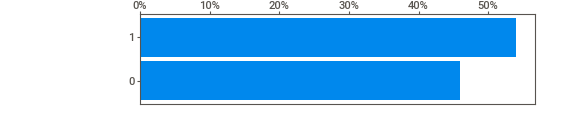
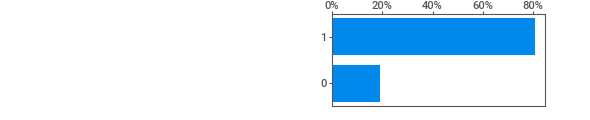
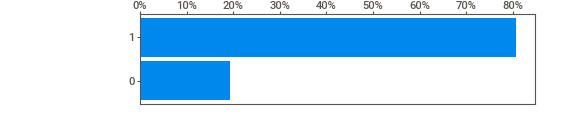
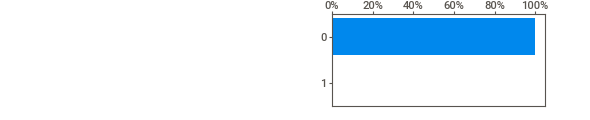
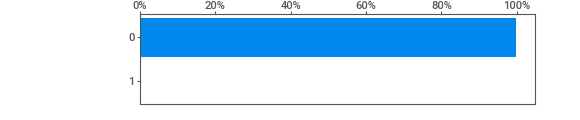
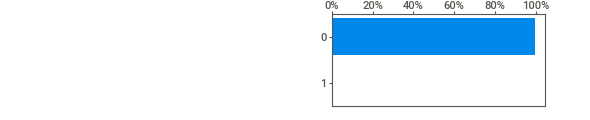
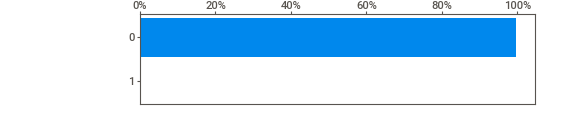
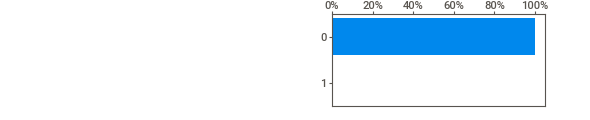
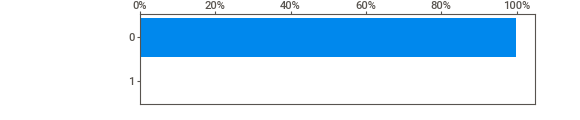
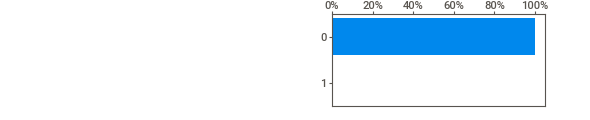
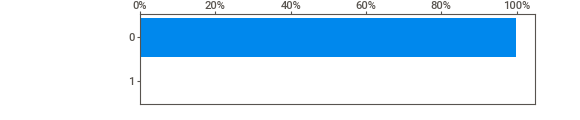
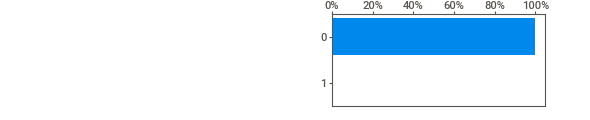
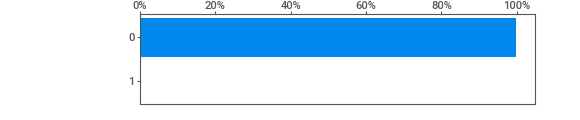
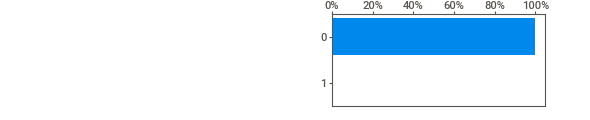
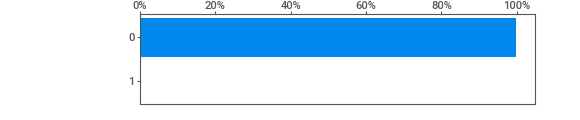
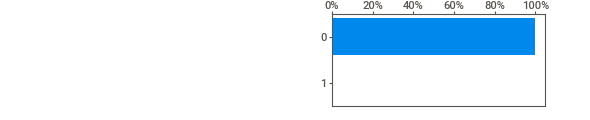
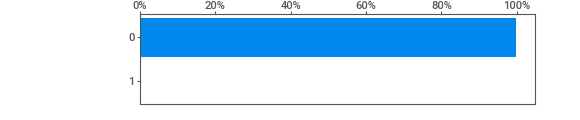
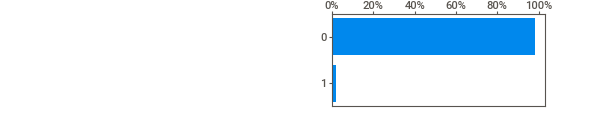
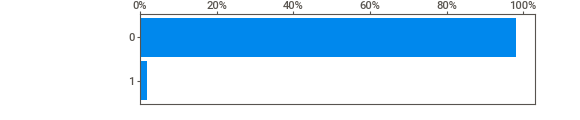
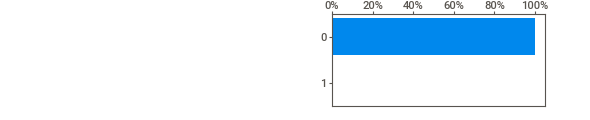
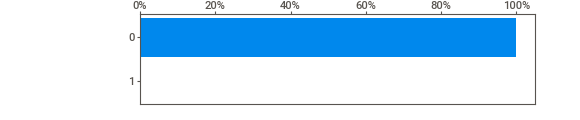
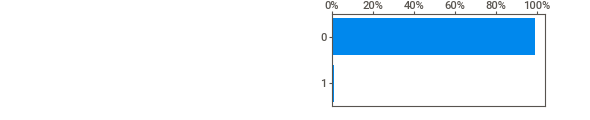
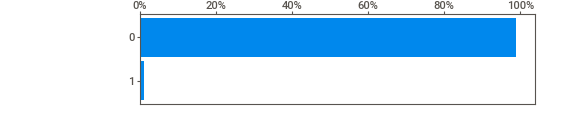
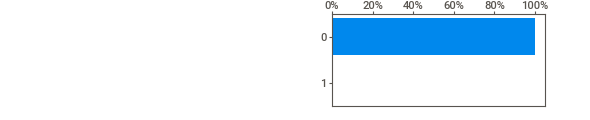
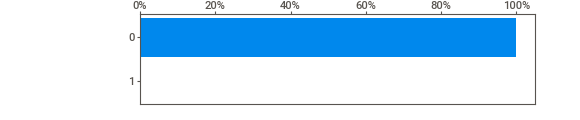
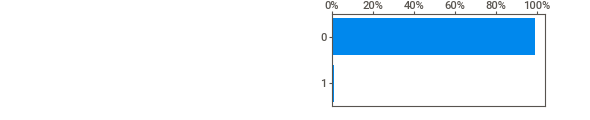
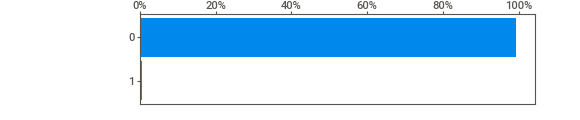
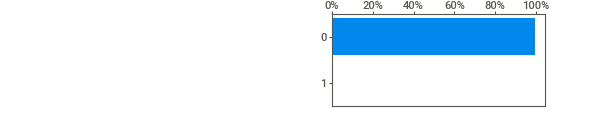
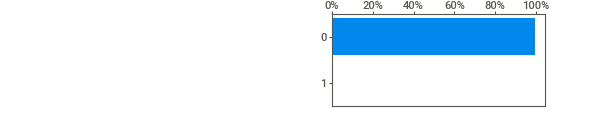
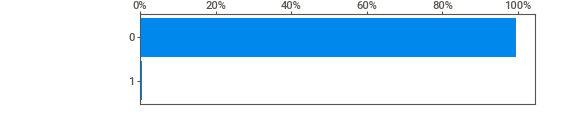
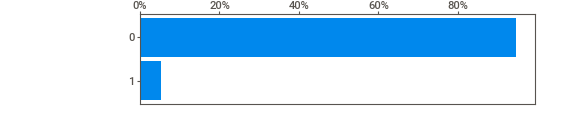
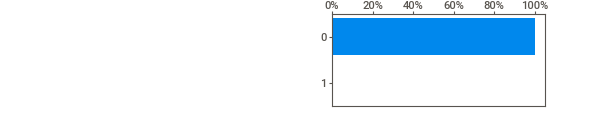
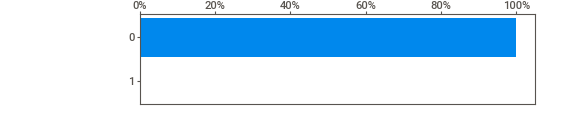
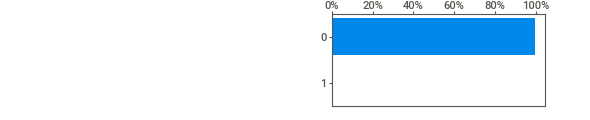
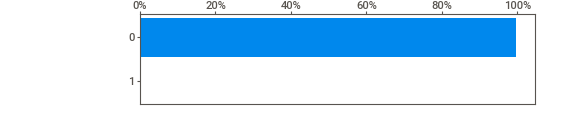
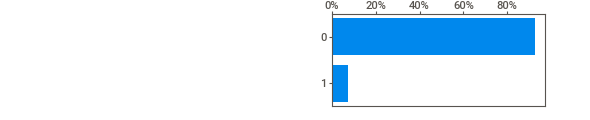
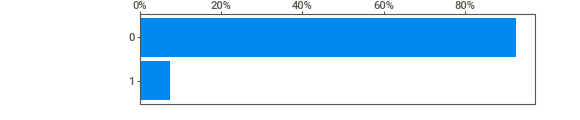
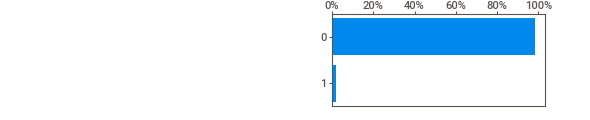
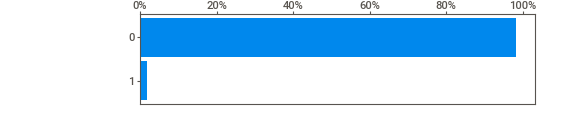
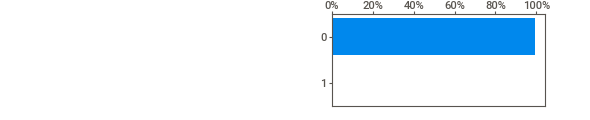
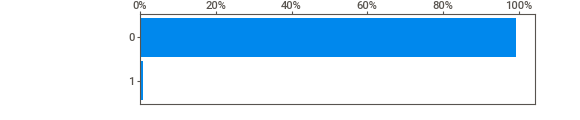
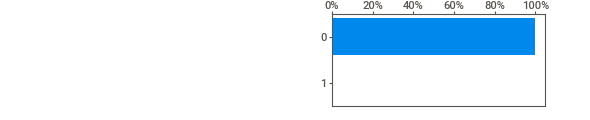
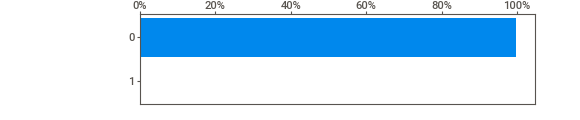
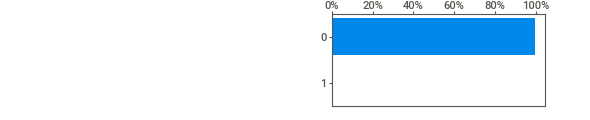
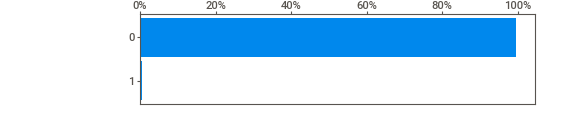
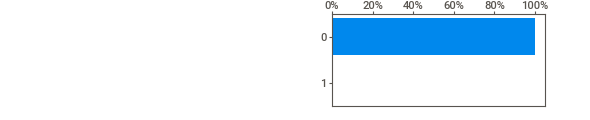
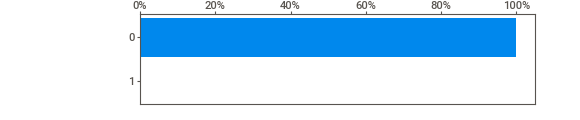
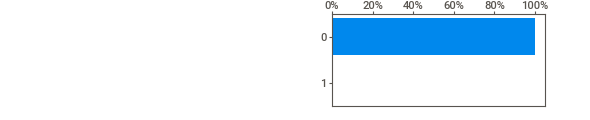
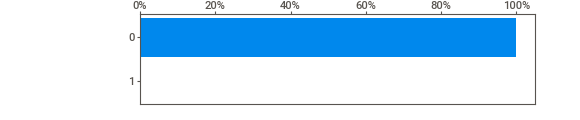
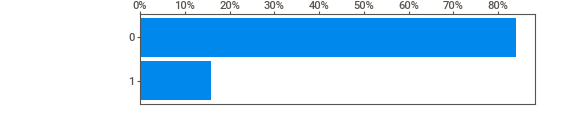
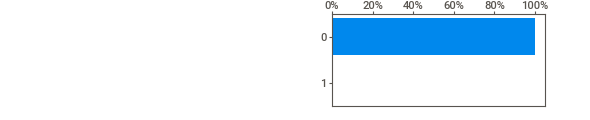
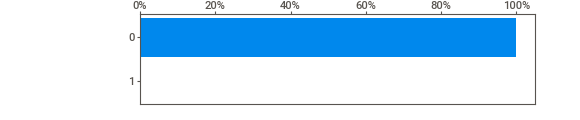
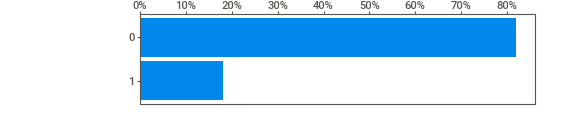
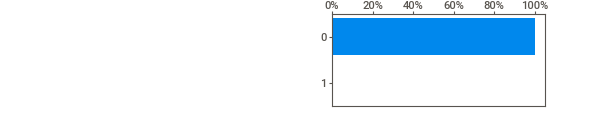
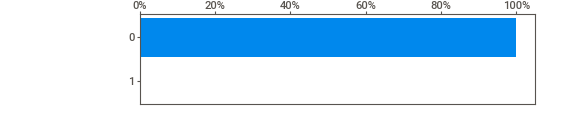
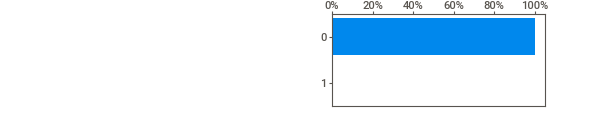
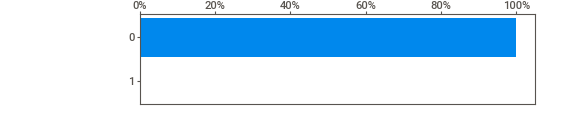
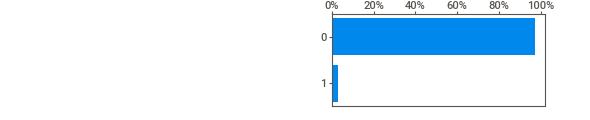
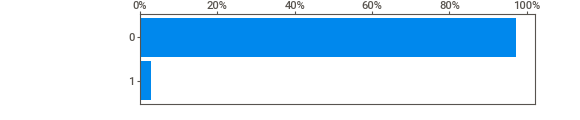
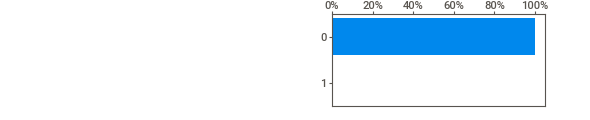
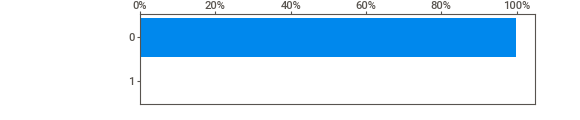
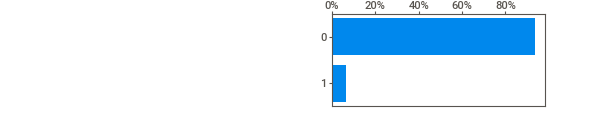
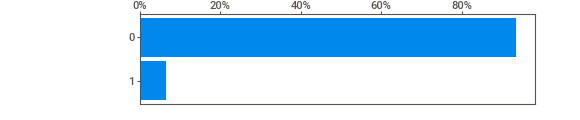
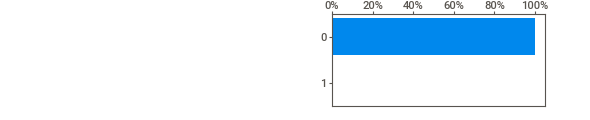
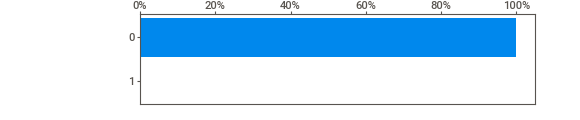
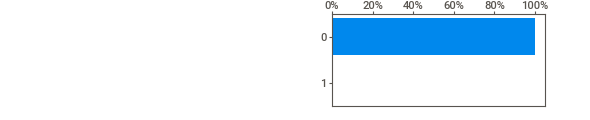
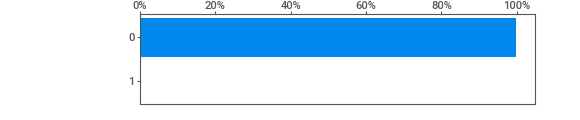
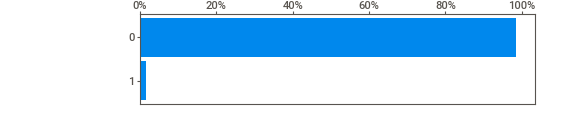
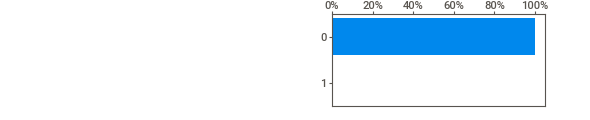
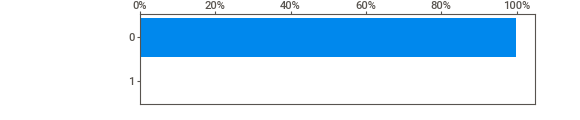
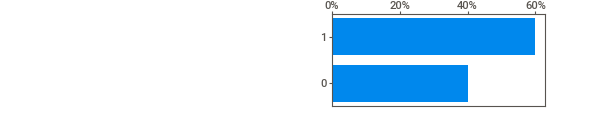
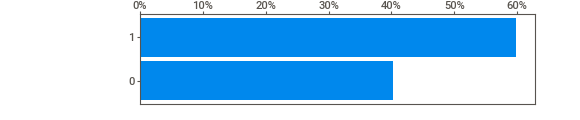
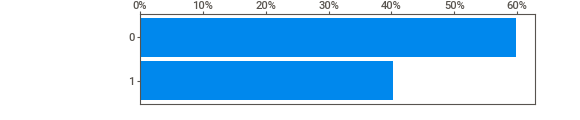
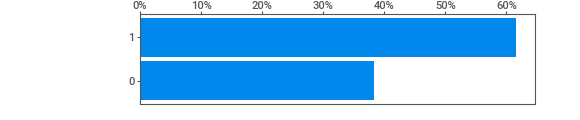
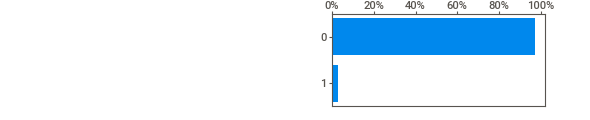
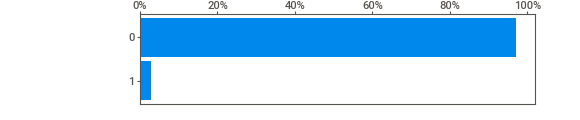
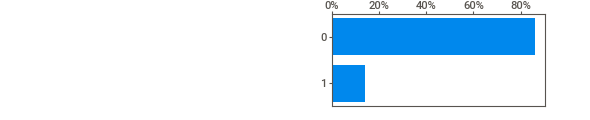
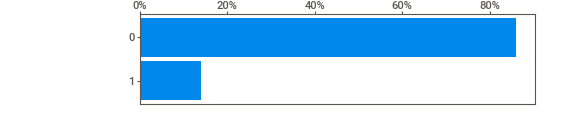
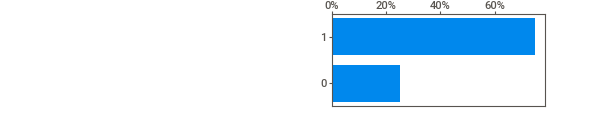
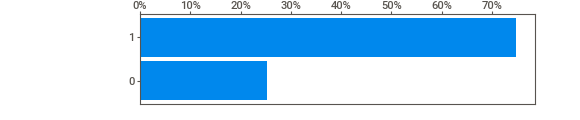
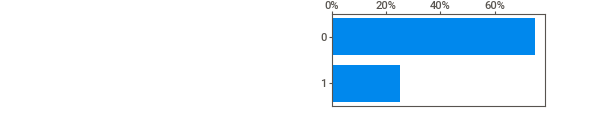
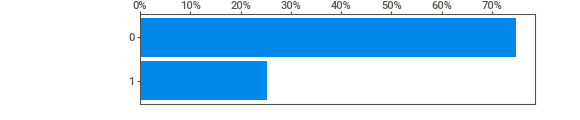
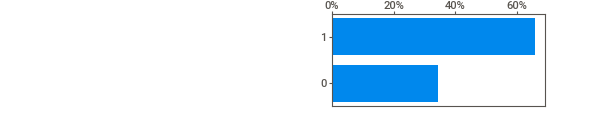
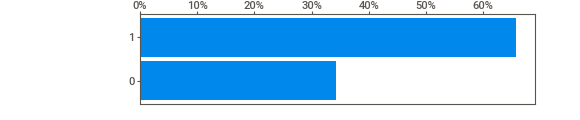
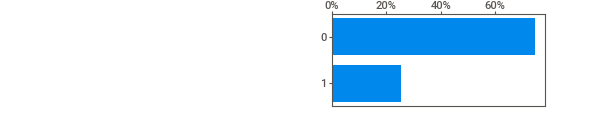
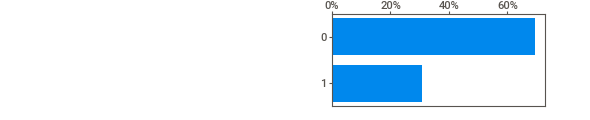
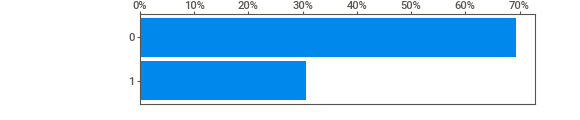
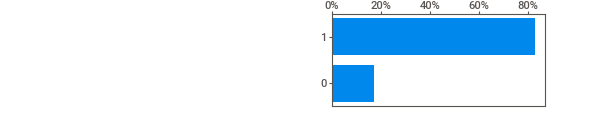
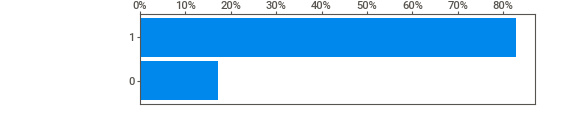
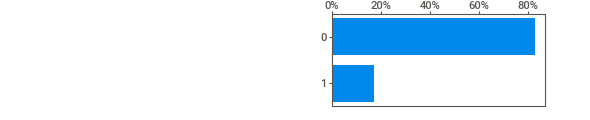
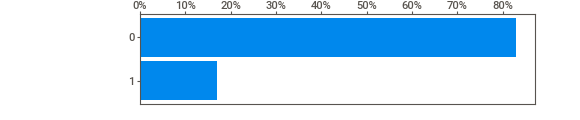
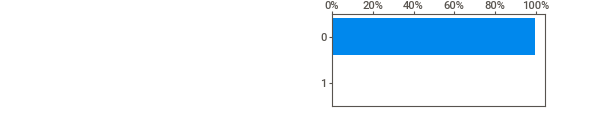
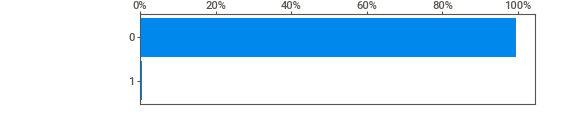
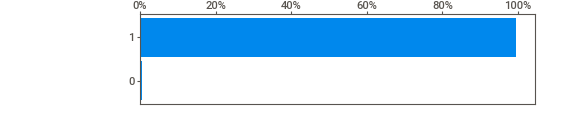
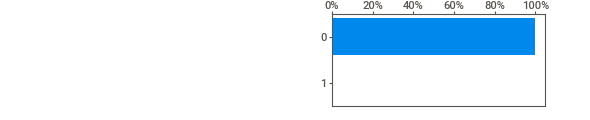
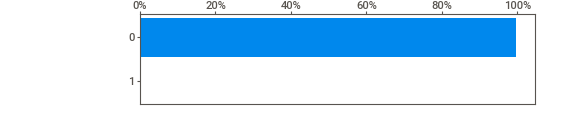
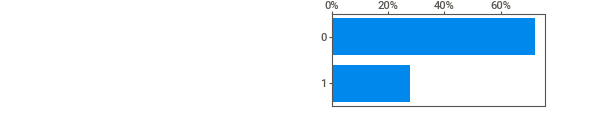
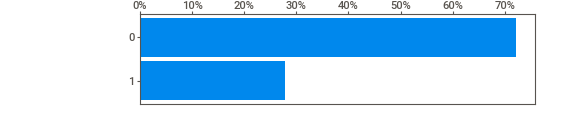
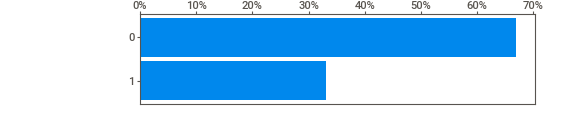
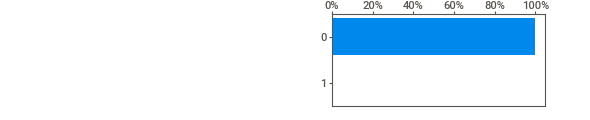
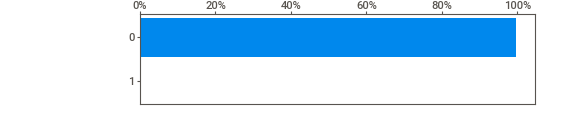
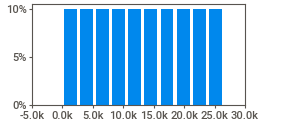
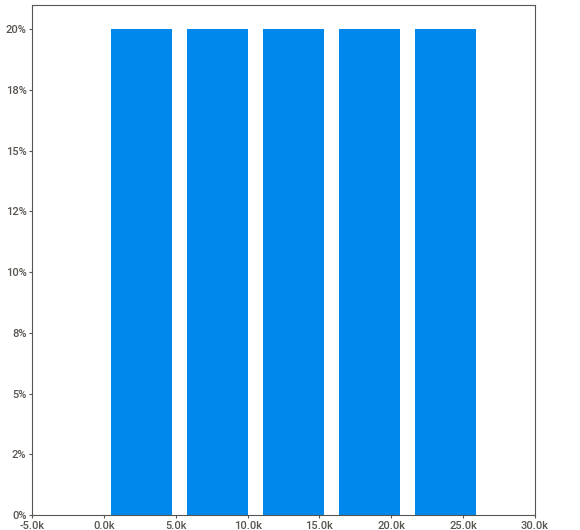
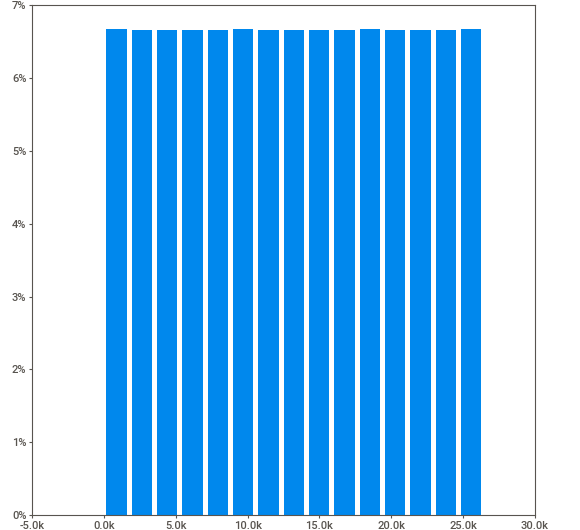

In [6]:
# Criando o relatório
df_eda = sv.analyze(df, pairwise_analysis='off')
df_eda.show_html('fraud_prevention_eda.html') # save as html file to better explore data in a browser tab
df_eda.show_notebook(layout='vertical',w=1200, h=800, scale=0.9)

## Dataset XGBoost

In [7]:
# link do arquivo no Drive
link = 'https://drive.google.com/file/d/1U6RV2fdFHoqOyXmNbP6mFMEs23RfmGNG/view?usp=sharing'
 
# extraindo o ID do link
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('base_tcc_xgboost20220927.csv') 

# criando o dataframe 
df = pd.read_csv('base_tcc_xgboost20220927.csv', sep=';')
df.head()

target      var2      var3  var4  var5  var6  var7  var8  var9  var10  ...  \
0       0  0.067438  1.079848     0     0     1     0     0     1      0  ...   
1       1 -0.100546  0.328359     0     0     0     0     0     1      0  ...   
2       0  0.417274 -0.553128     1     0     0     0     0     0      1  ...   
3       0 -0.266698  1.310873     0     0     0     0     1     0      0  ...   
4       1  0.379618  0.011451     0     0     0     0     0     0      0  ...   

   var49  var50  var51  var52  var53  var54  var55  var56  var57   id  
0      0      0      1      0      0      1      1      0      0   26  
1      0      0      1      0      1      0      1      0      0  128  
2      0      0      1      0      1      0      1      0      1  147  
3      0      0      0      1      1      0      1      0      0  174  
4      1      0      1      0      1      0      0      0      1  186  

[5 rows x 58 columns]

                                             |          | [  0%]   00:00 -> (? left)

Report fraud_prevention_eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



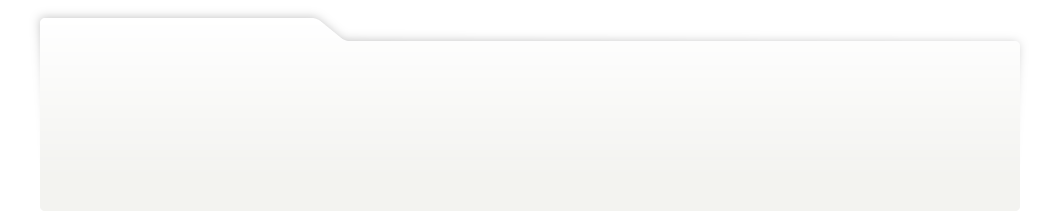
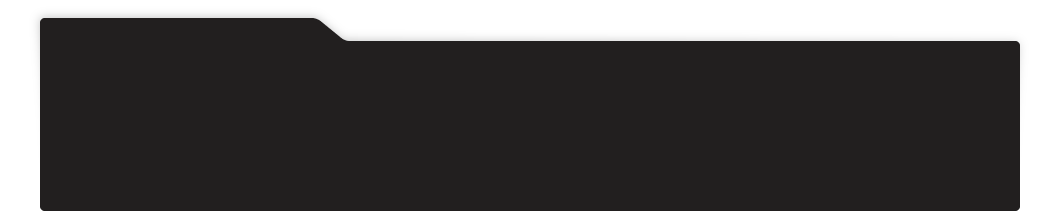
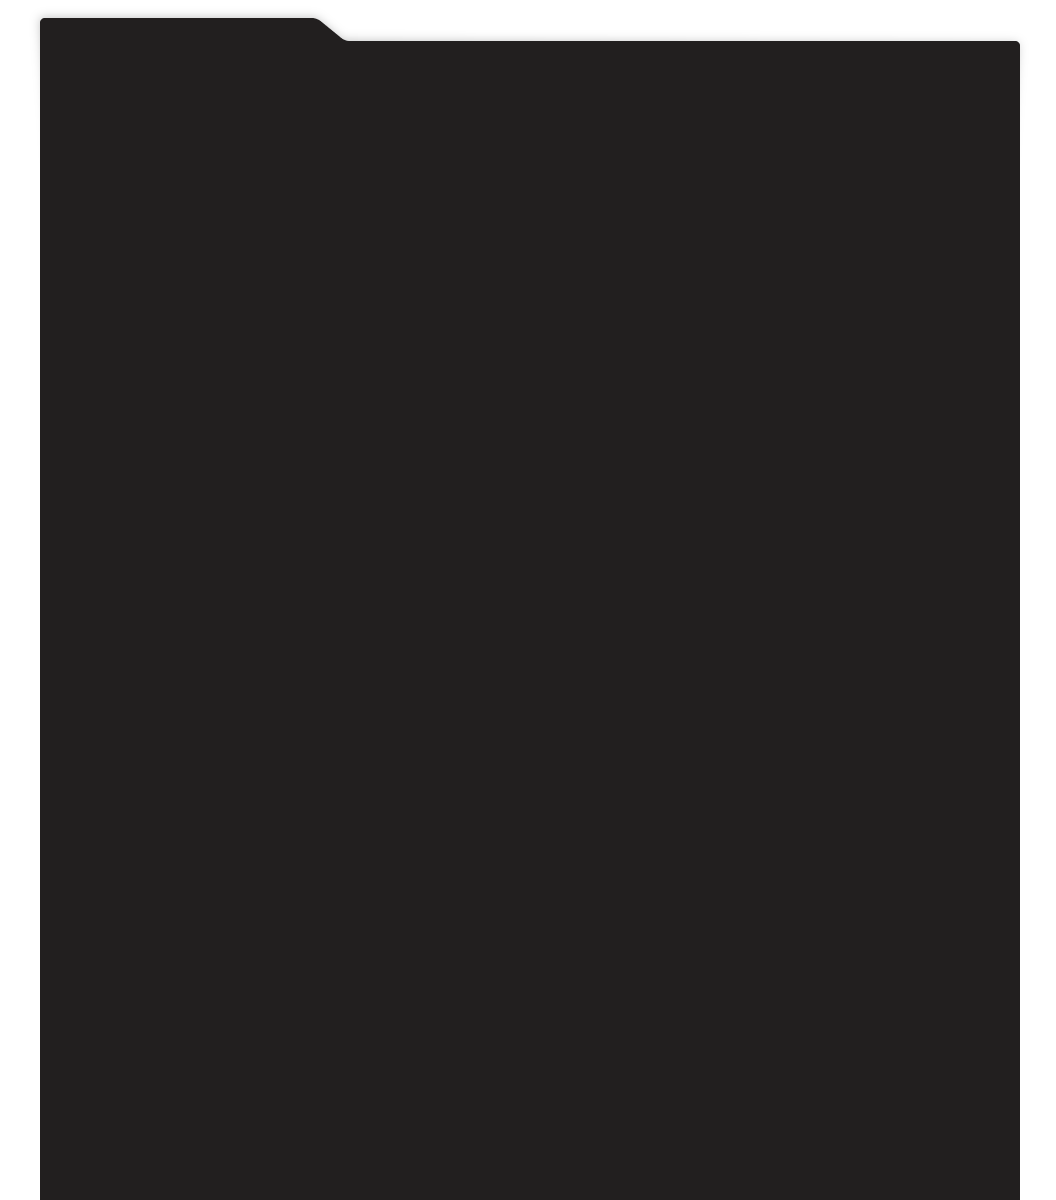
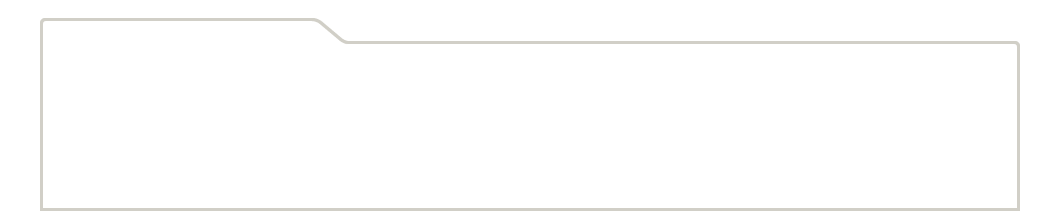
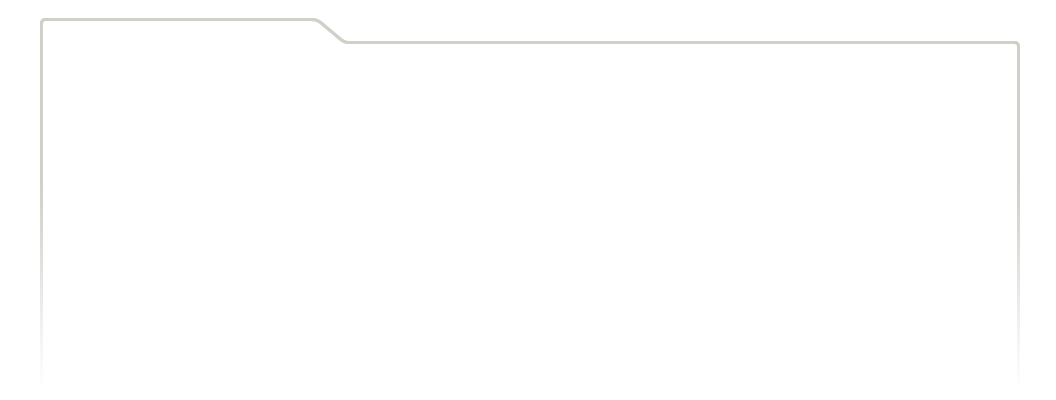
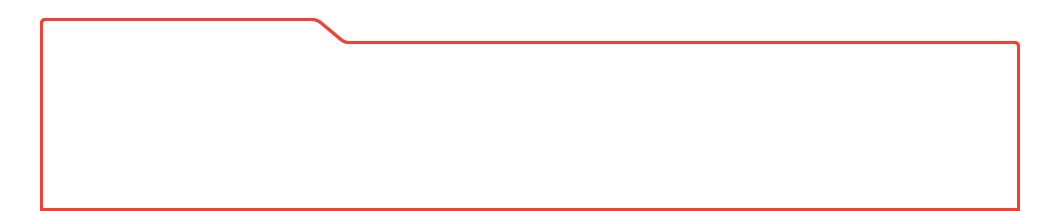
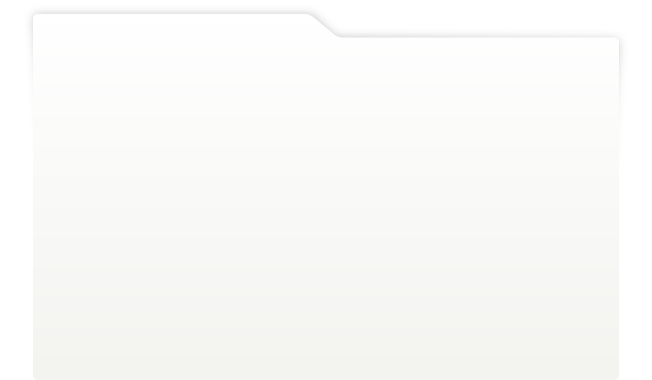
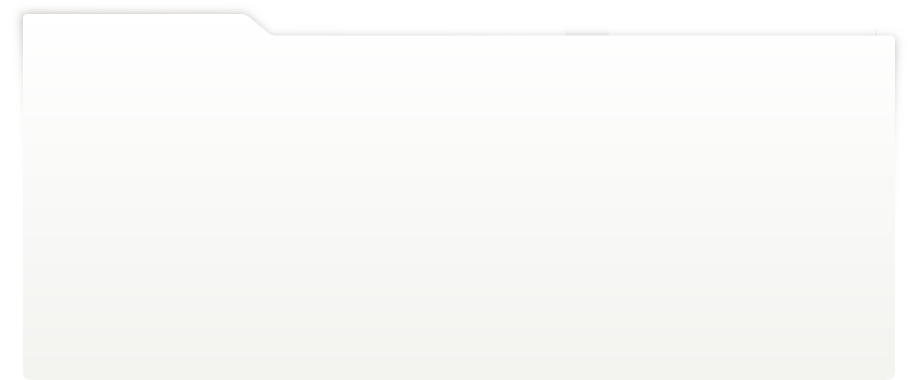
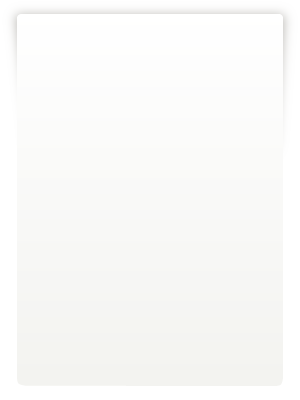
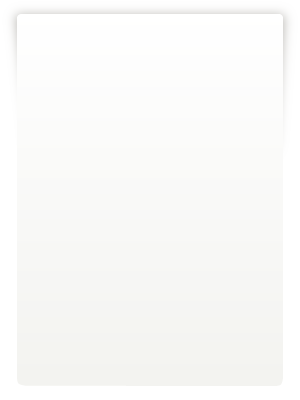
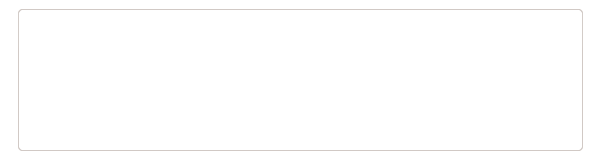
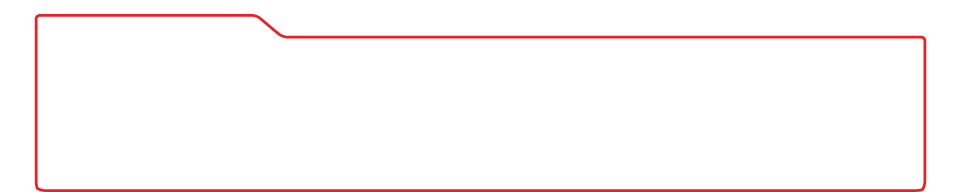
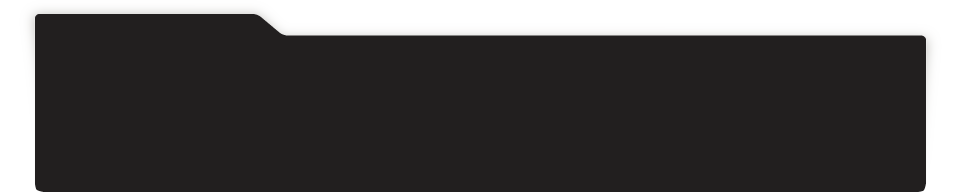
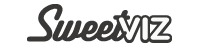
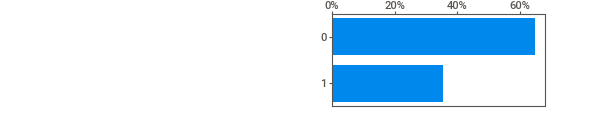
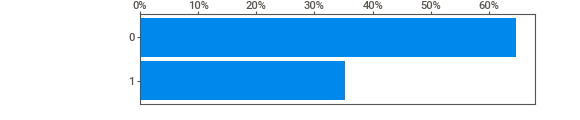
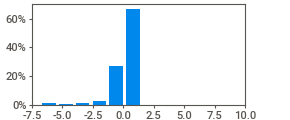
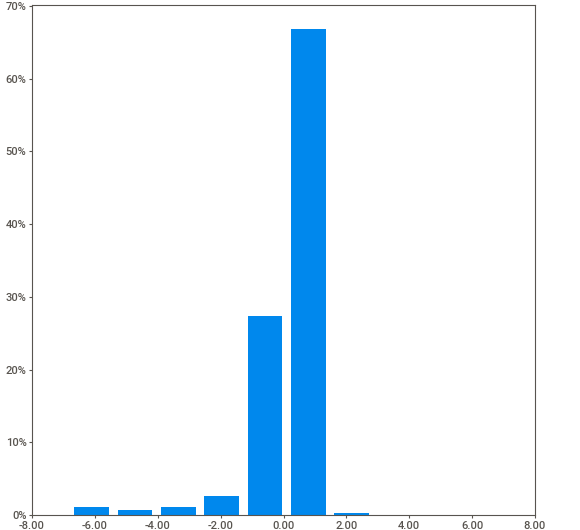
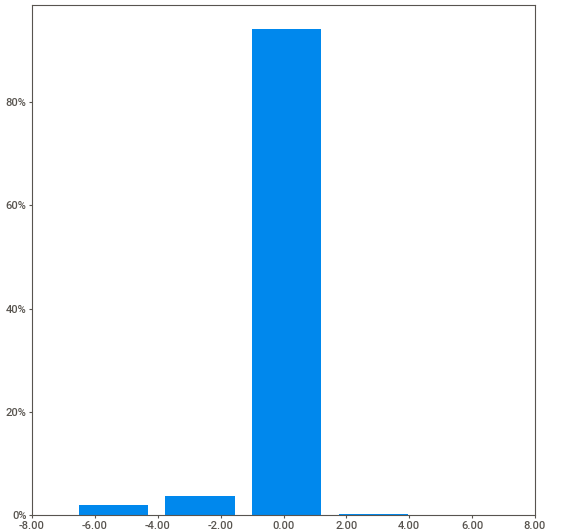
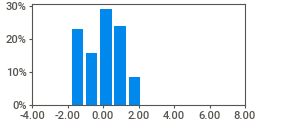
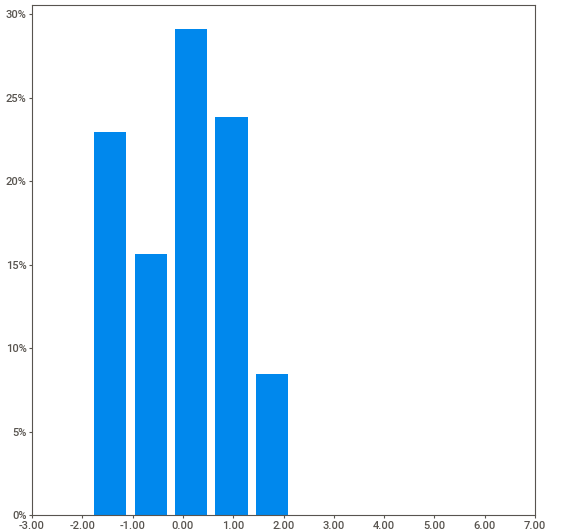
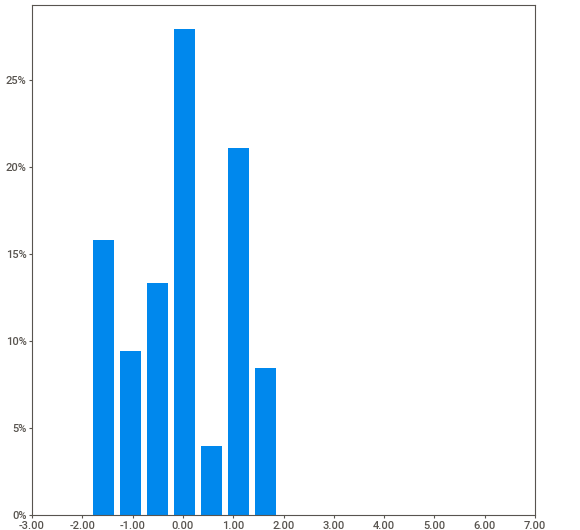
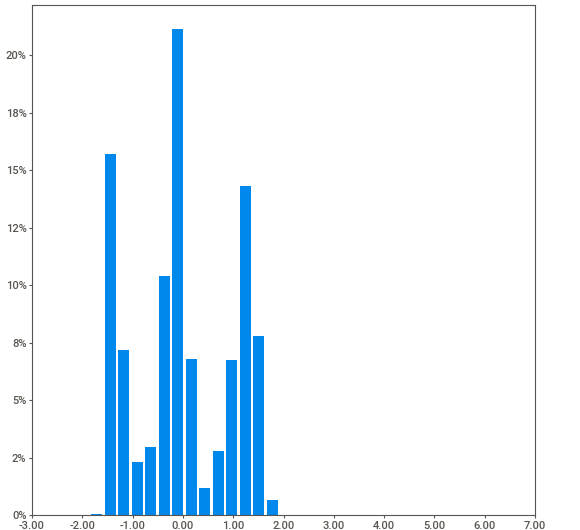
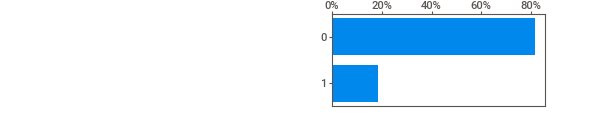
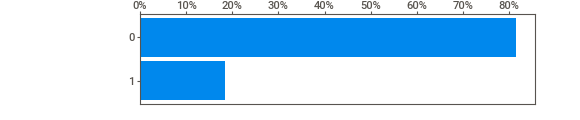
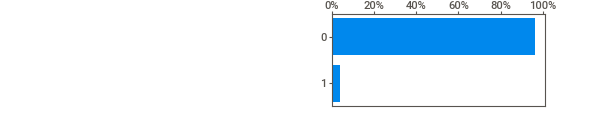
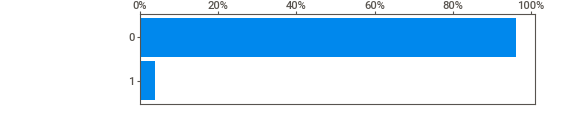
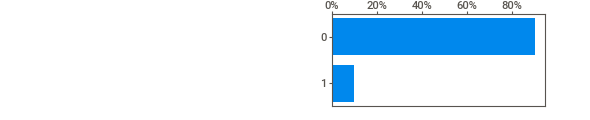
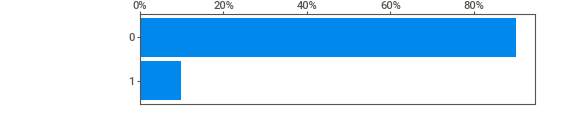
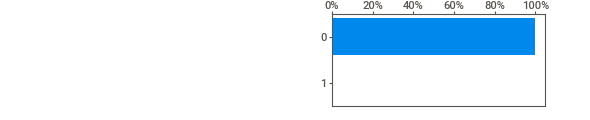
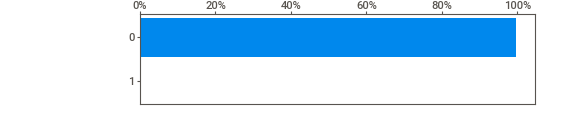
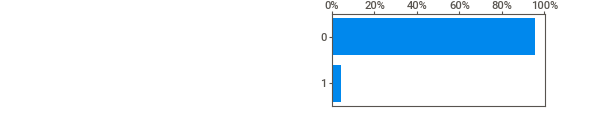
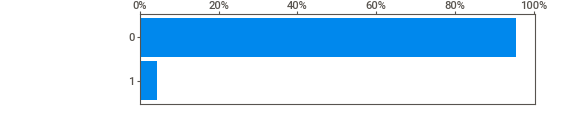
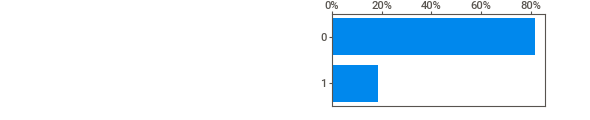
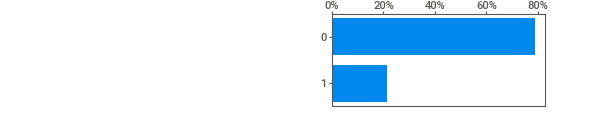
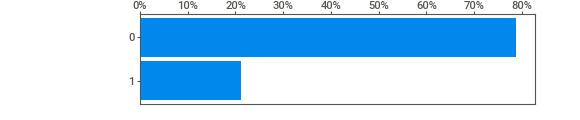
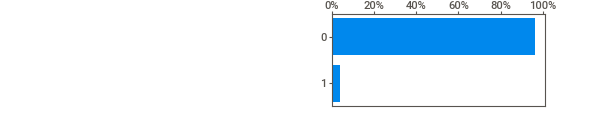
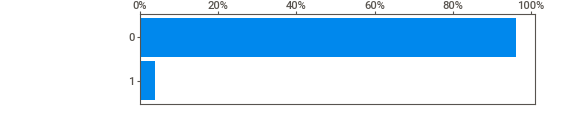
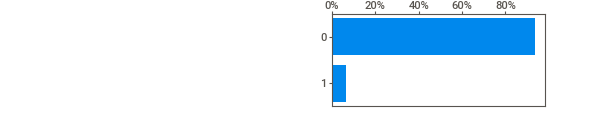
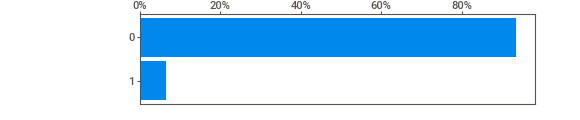
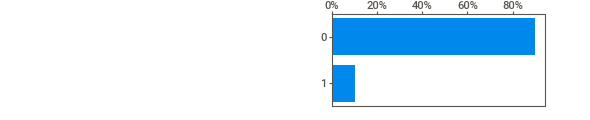
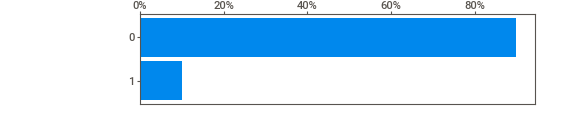
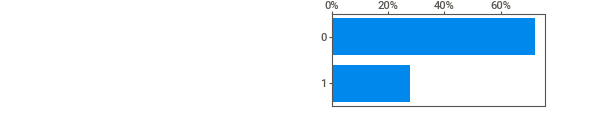
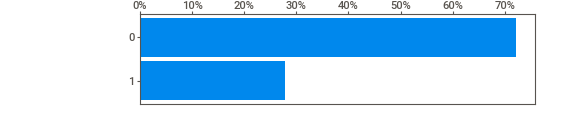
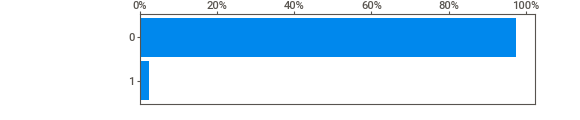
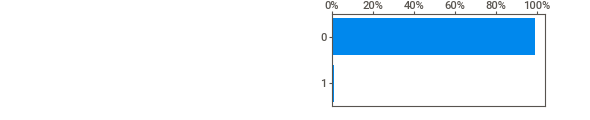
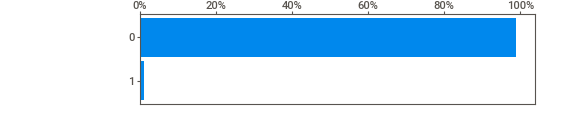
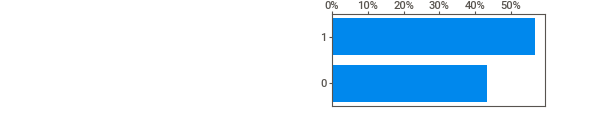
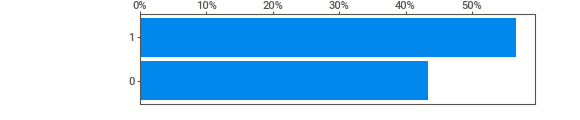
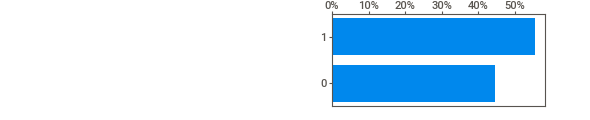
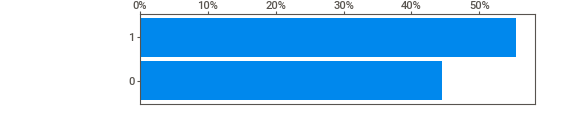
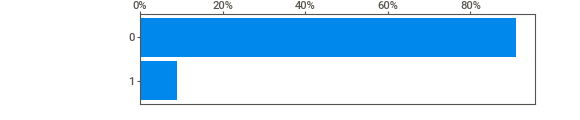
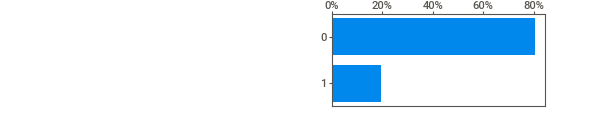
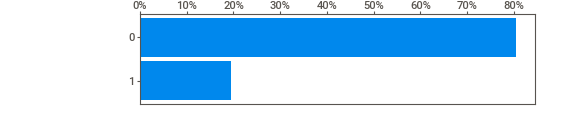
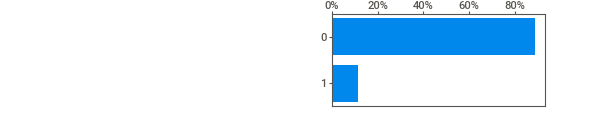
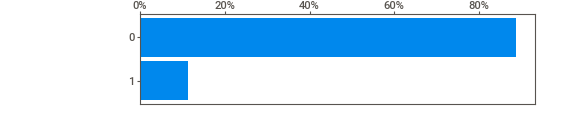
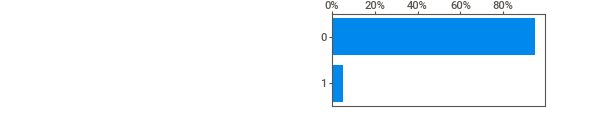
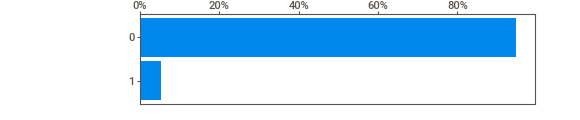
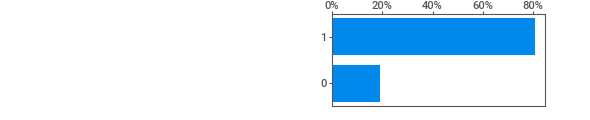
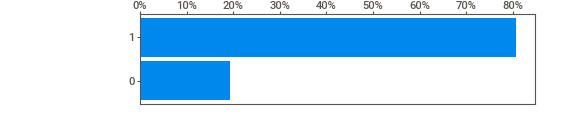
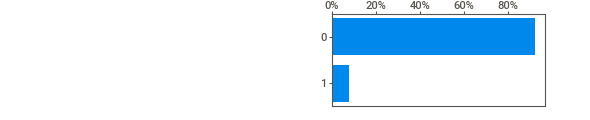
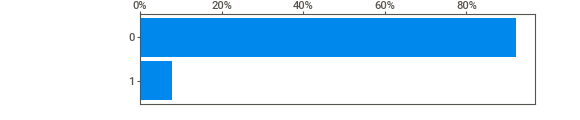
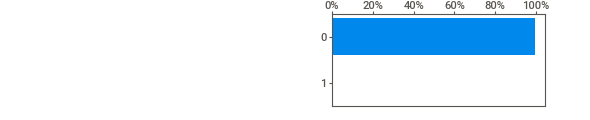
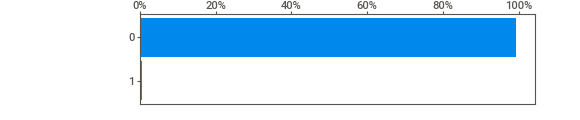
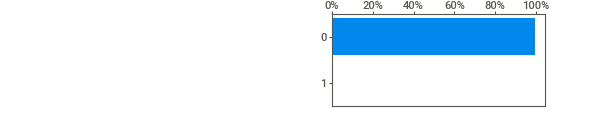
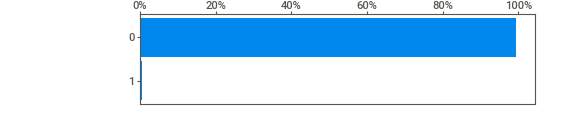
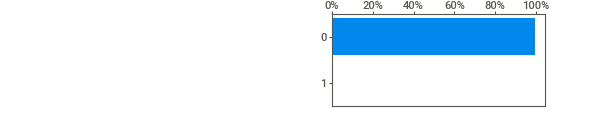
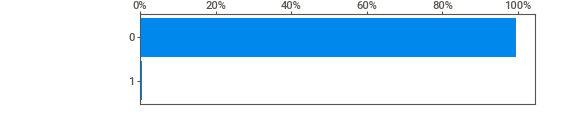
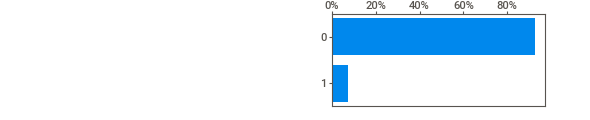
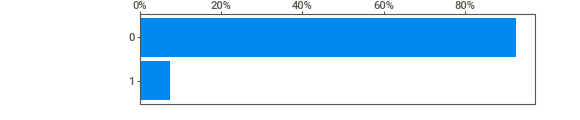
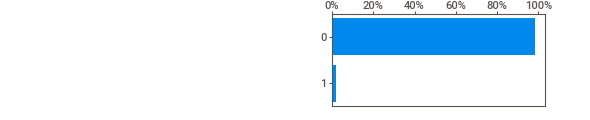
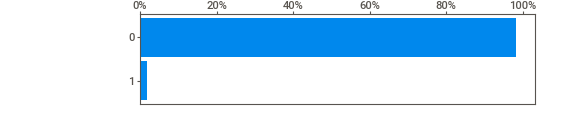
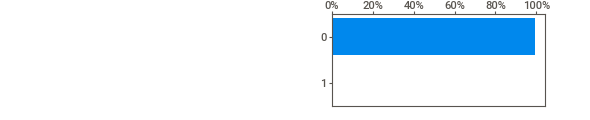
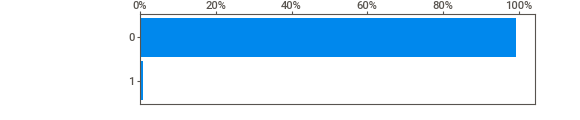
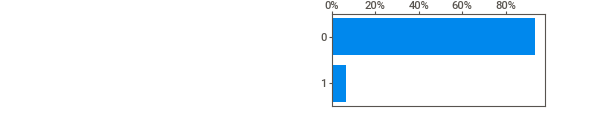
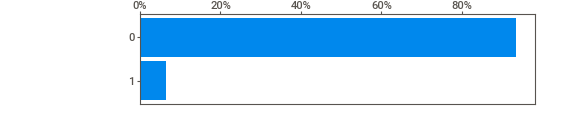
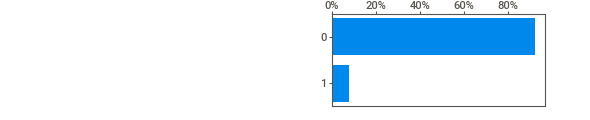
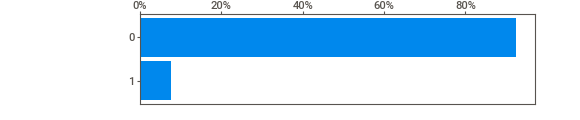
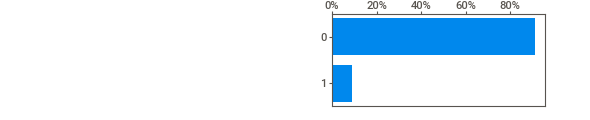
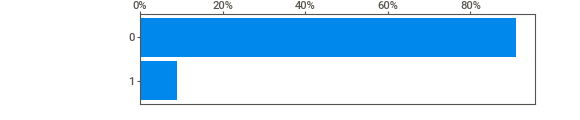
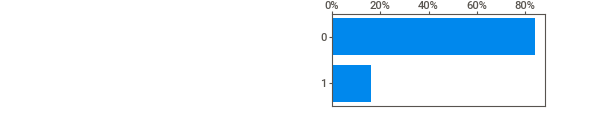
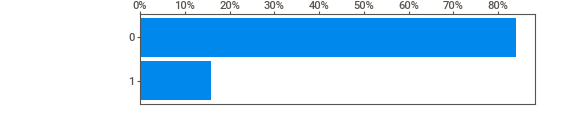
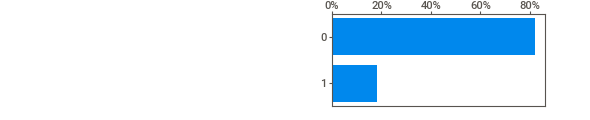
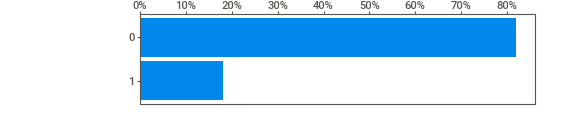
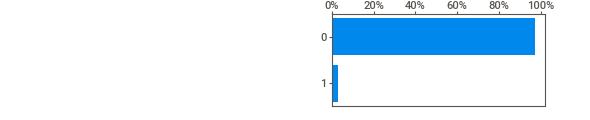
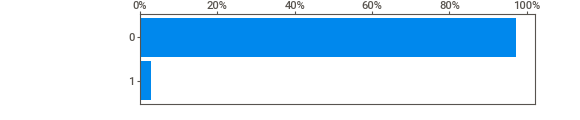
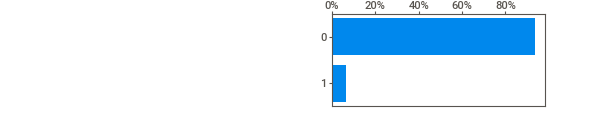
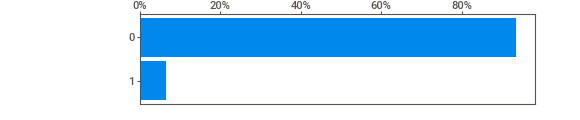
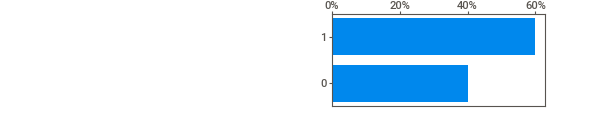
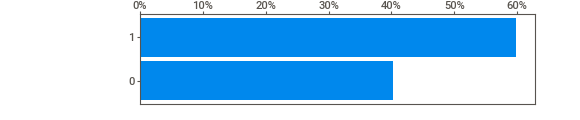
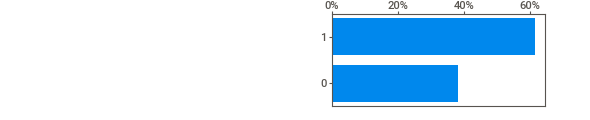
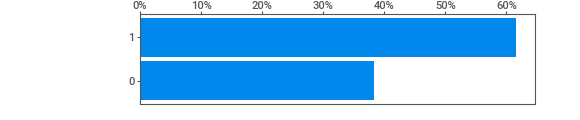
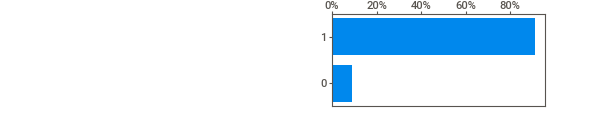
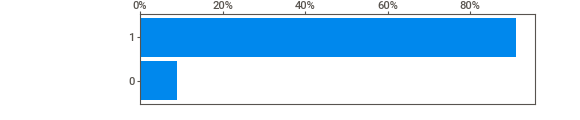
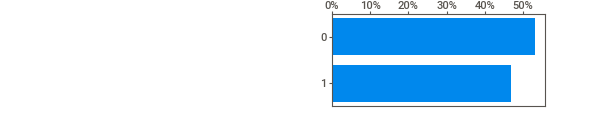
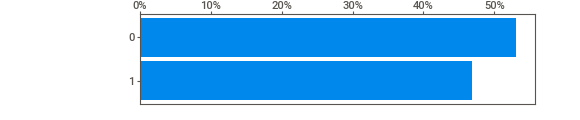
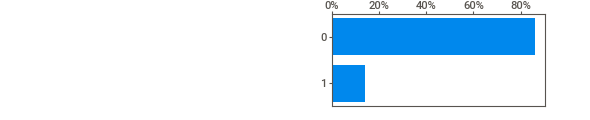
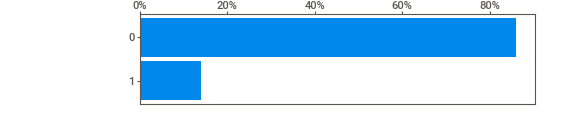
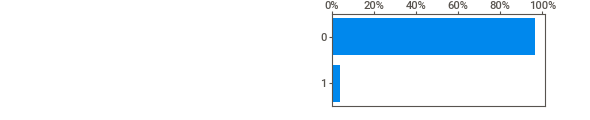
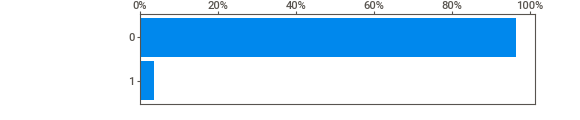
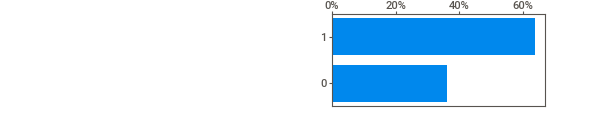
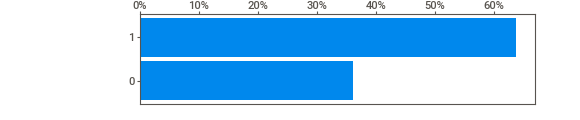
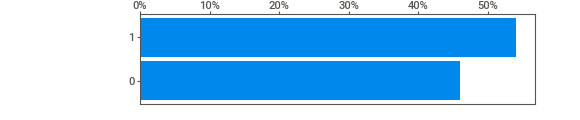
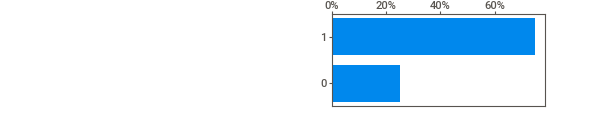
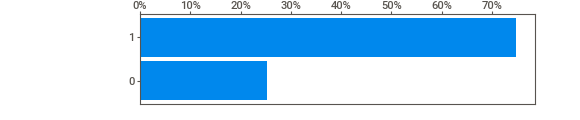
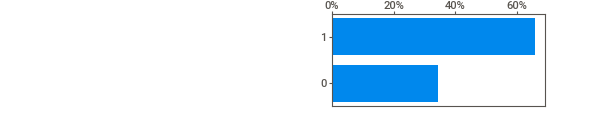
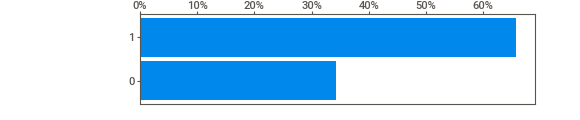
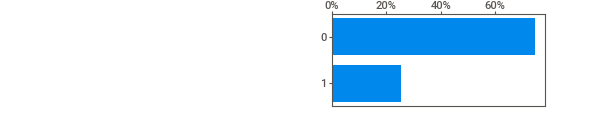
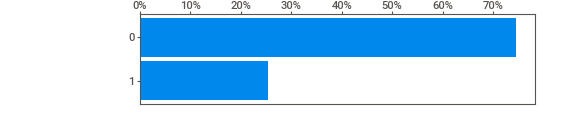
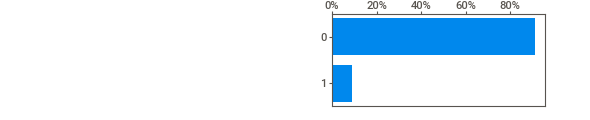
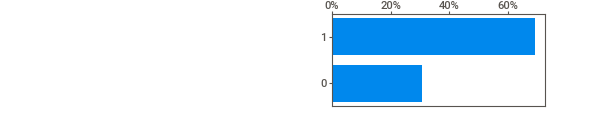
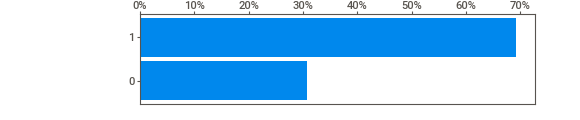
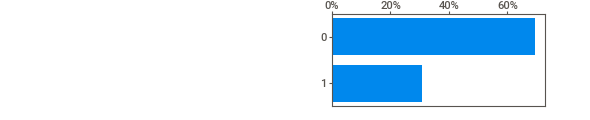
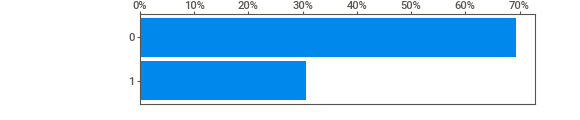
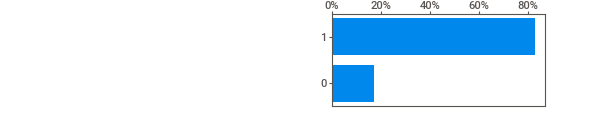
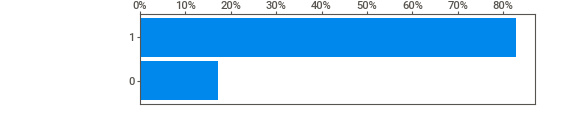
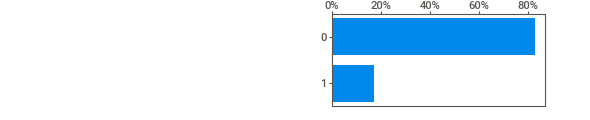
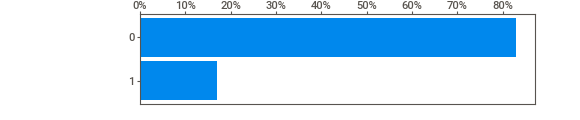
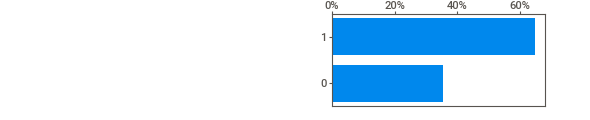
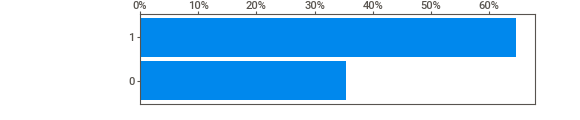
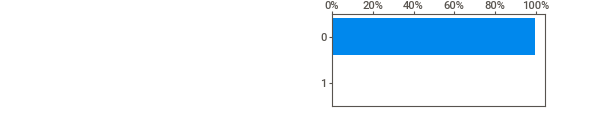
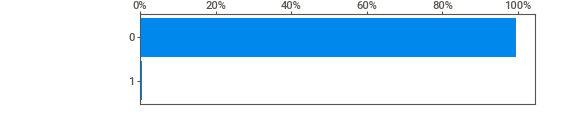
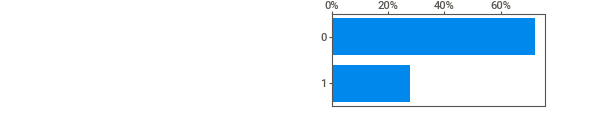
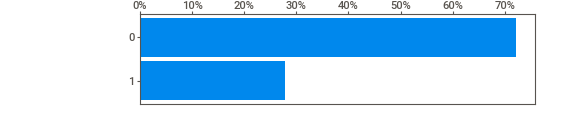
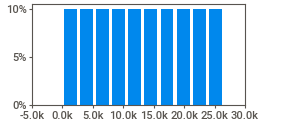
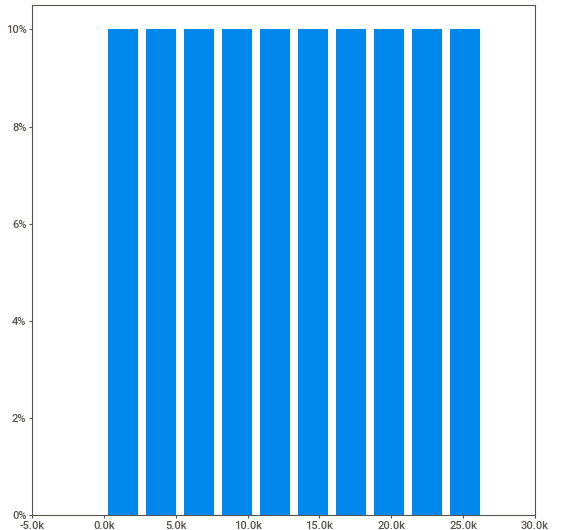
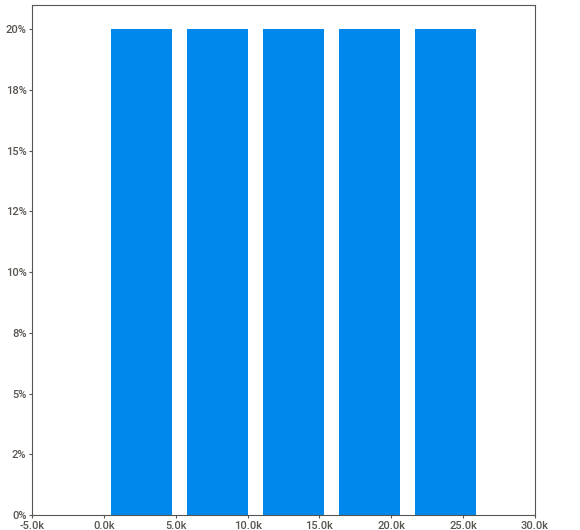
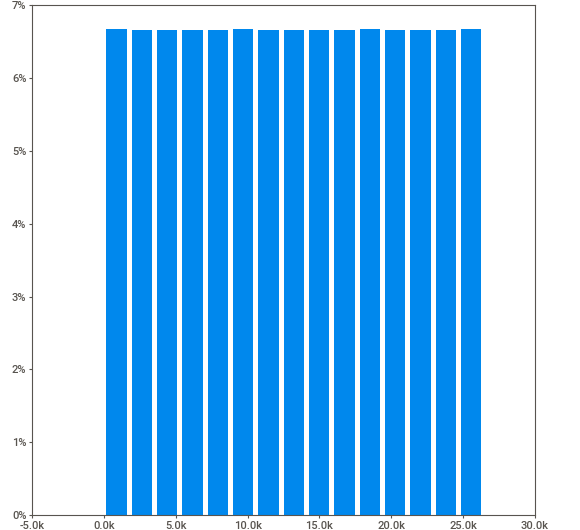

In [8]:
# Criando o relatório
df_eda = sv.analyze(df, pairwise_analysis='off')
df_eda.show_html('fraud_prevention_eda.html') # save as html file to better explore data in a browser tab
df_eda.show_notebook(layout='vertical',w=1200, h=800, scale=0.9)